## 요약

성별코드, 연령대 코드, 허리둘레, 수축기 혈압, 이완기 혈압, 식전혈당, 요단백, 흡연상태, 음주여부 -> 기존칼럼

청력 -> 청력(좌), 청력(우) 합침

당뇨코드 -> 식전혈당 분류

복부비만 -> 허리 둘레에 따른 복부비만도 측정

BMI코드 -> 신장, 체중에 따른 분류

고혈압여부 -> 수축기, 이완기 혈압에 따른 분류


혈색소 -> ?

요단백 null 값 -> ?

## #코드

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


In [5]:
#import matplotlib as mpl
#mpl.rcParams['agg.path.chunksize'] = 10000

In [6]:
df = pd.read_csv('data.csv',encoding='CP949')
pd.set_option('display.max_columns', None)

In [7]:
df = df.rename(columns={"연령대 코드(5세단위)":"연령대 코드", 
                        "신장(5Cm단위)":"신장", 
                        "체중(5Kg 단위)":"체중",
                        "식전혈당(공복혈당)":"식전혈당"})

In [5]:
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당,총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,1.0,1.0,112.0,70.0,93.0,NaN,NaN,NaN,NaN,15.5,1.0,1.0,18.0,32.0,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,1.0,1.0,114.0,76.0,89.0,NaN,NaN,NaN,NaN,14.0,1.0,0.5,15.0,8.0,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
2,2019,3,41,1,13,160,70,87.0,0.9,0.8,1.0,1.0,109.0,73.0,100.0,232.0,114.0,57.0,152.0,15.6,1.0,1.0,30.0,21.0,17.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
3,2019,4,28,1,12,170,60,85.0,0.4,1.2,1.0,1.0,131.0,85.0,85.0,NaN,NaN,NaN,NaN,14.5,1.0,0.7,17.0,19.0,32.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,5,41,1,10,170,70,81.2,0.7,0.7,1.0,1.0,112.0,66.0,91.0,NaN,NaN,NaN,NaN,14.9,1.0,0.9,19.0,24.0,19.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231


In [6]:
#기준년도, 가입자 일련번호 시도 코드 등 분류용 코드 제거, 치아 데이터 제거
df= df[['성별코드', '연령대 코드', '신장',
       '체중', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부']].copy()

In [7]:
df.describe()

,성별코드,연령대 코드,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당,총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999597.000000,999805.000000,999812.000000,999819.000000,999822.000000,994576.000000,994575.000000,994477.000000,333549.000000,333544.000000,333541.000000,327148.000000,994468.000000,989694.000000,994474.000000,994478.000000,994477.000000,994470.000000,999834.000000,644918.000000
mean,1.480426,10.496387,162.307655,63.564490,81.320565,0.971909,0.970951,1.033041,1.031741,122.472550,75.754700,100.846105,196.367727,133.873573,56.622319,113.910322,14.251682,1.104043,0.860555,26.231107,25.996708,36.294294,1.369669,0.999972
std,0.499617,2.964080,9.280317,12.877611,10.523122,0.593307,0.600537,0.178744,0.175309,14.608604,10.045696,23.768812,41.311458,101.115556,14.913722,39.713293,1.566103,0.453434,0.477701,24.046478,27.710895,48.390706,0.482715,0.005283
min,1.000000,5.000000,130.000000,30.000000,3.000000,0.100000,0.100000,1.000000,1.000000,57.000000,28.000000,2.000000,50.000000,4.000000,1.000000,1.000000,0.800000,1.000000,0.060000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,8.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,89.000000,169.000000,76.000000,46.000000,89.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,1.000000
50%,1.000000,11.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,121.000000,76.000000,96.000000,195.000000,109.000000,55.000000,112.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000,1.000000
75%,2.000000,13.000000,170.000000,70.000000,88.000000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,105.000000,221.000000,161.000000,65.000000,137.000000,15.400000,1.000000,1.000000,29.000000,30.000000,39.000000,2.000000,1.000000
max,2.000000,18.000000,195.000000,145.000000,999.000000,9.900000,9.900000,2.000000,2.000000,260.000000,200.000000,960.000000,2389.000000,4879.000000,588.000000,2278.000000,25.000000,6.000000,98.000000,7362.000000,6435.000000,999.000000,2.000000,1.000000


In [8]:
def get_plot(column_name, df):
    if(df[column_name].value_counts().shape[0]) > 100:
        plt.figure(figsize=(30,5))
    sns.countplot(x=column_name, data=df)
    plt.title(column_name)
    plt.show()

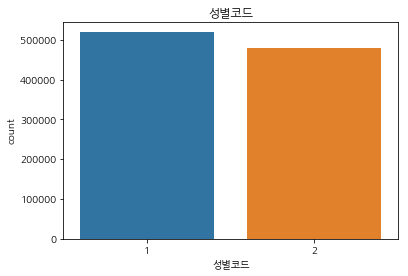

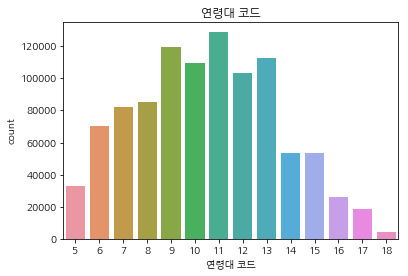

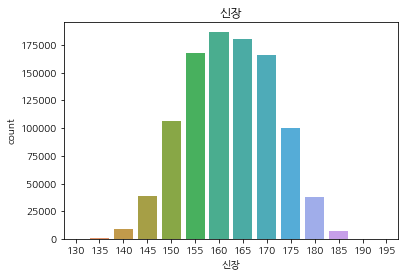

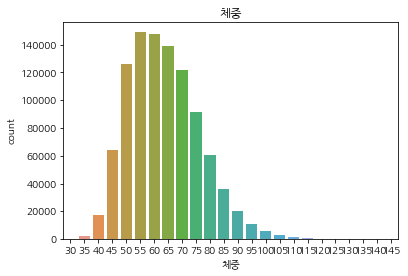

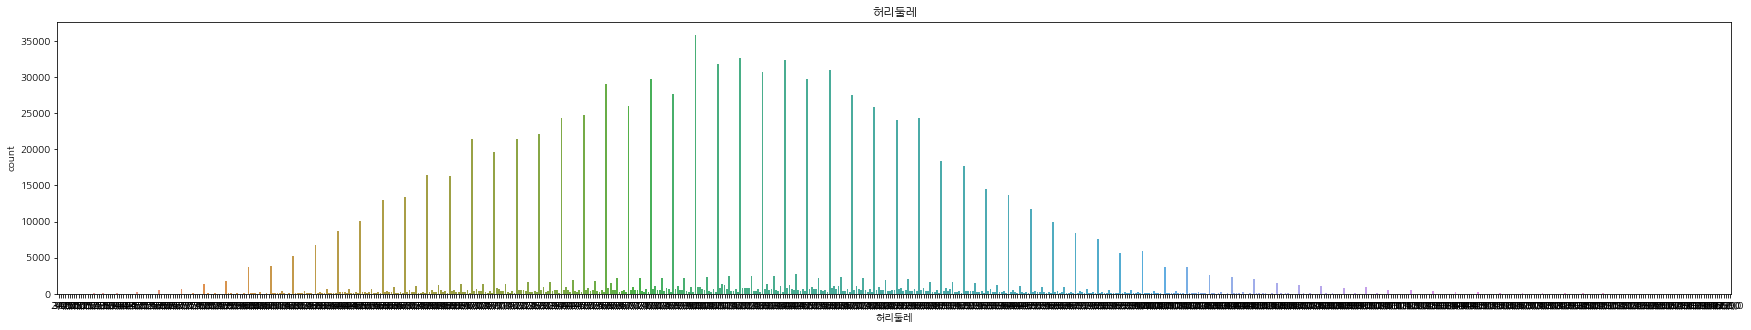

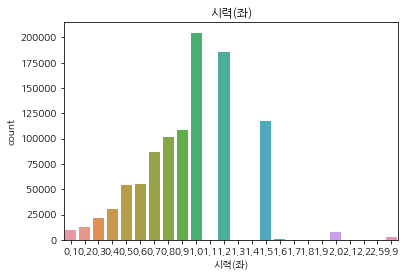

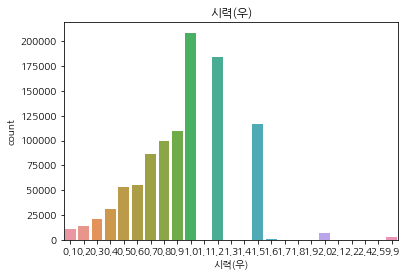

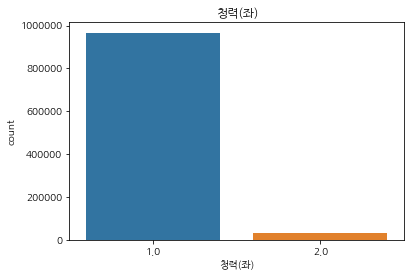

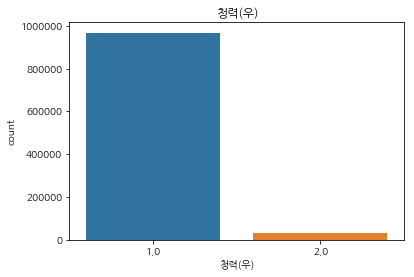

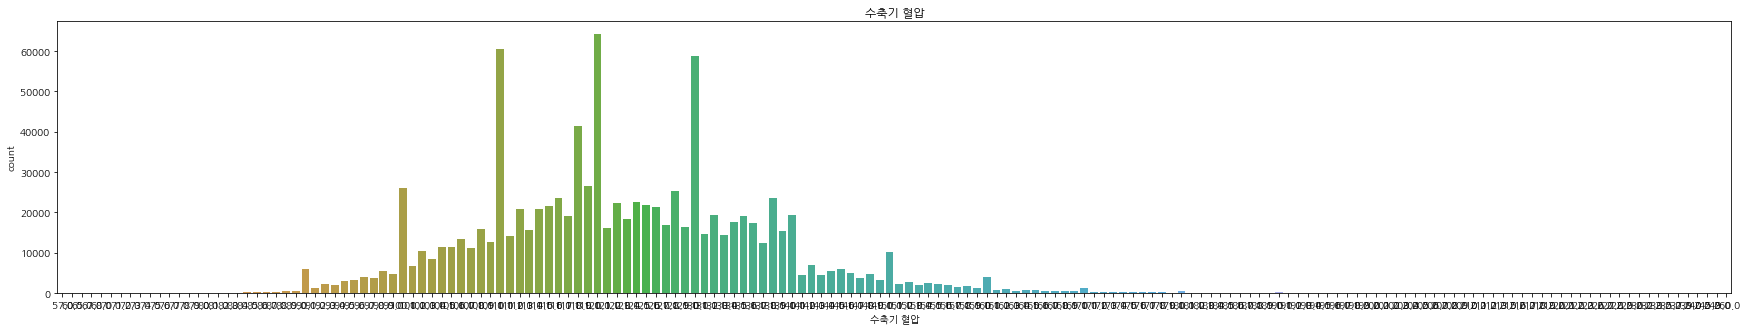

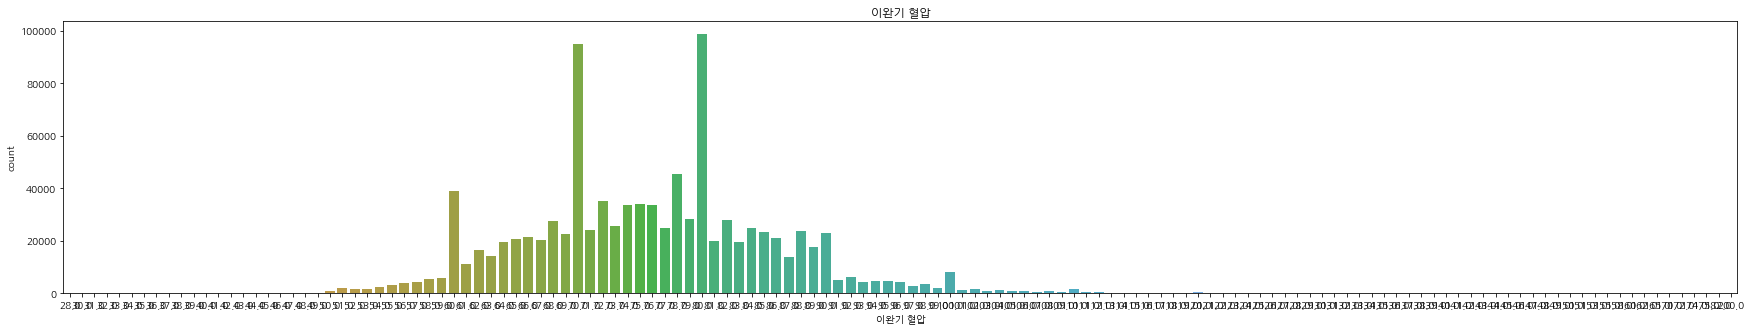

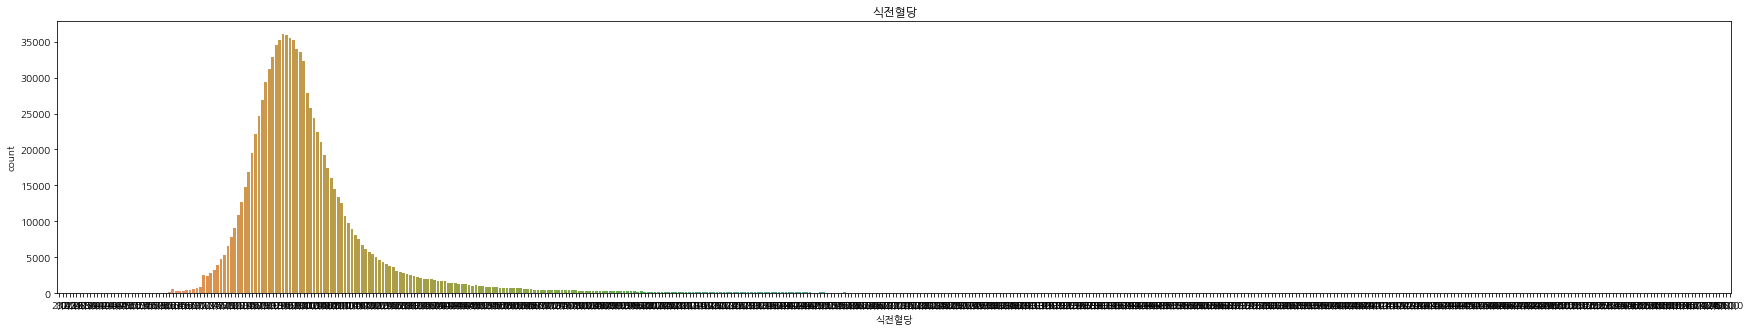

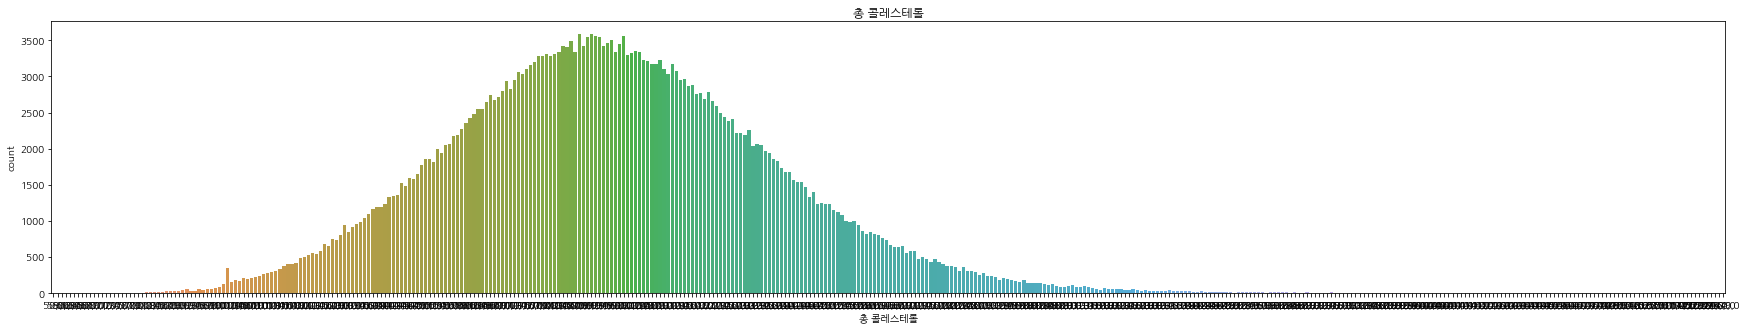

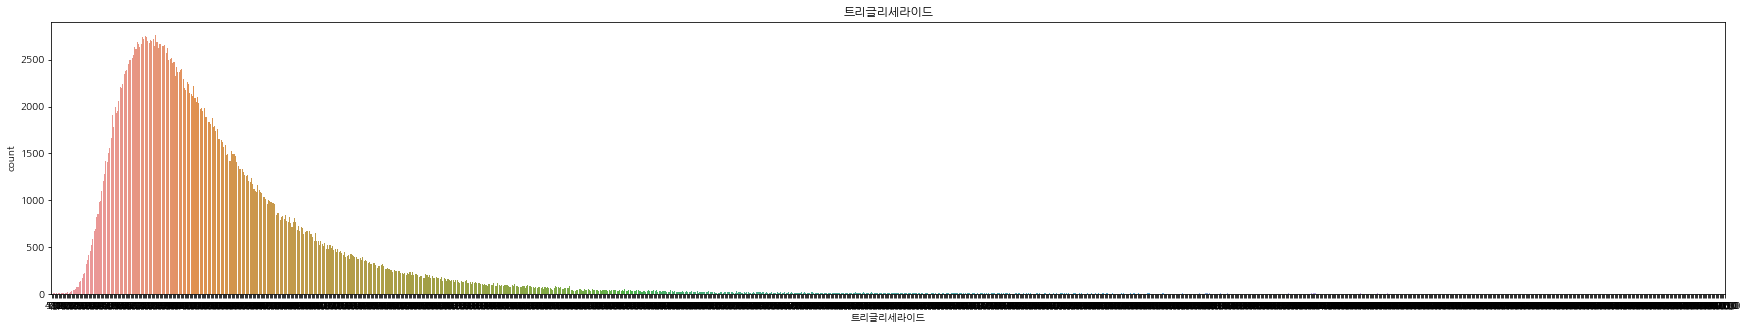

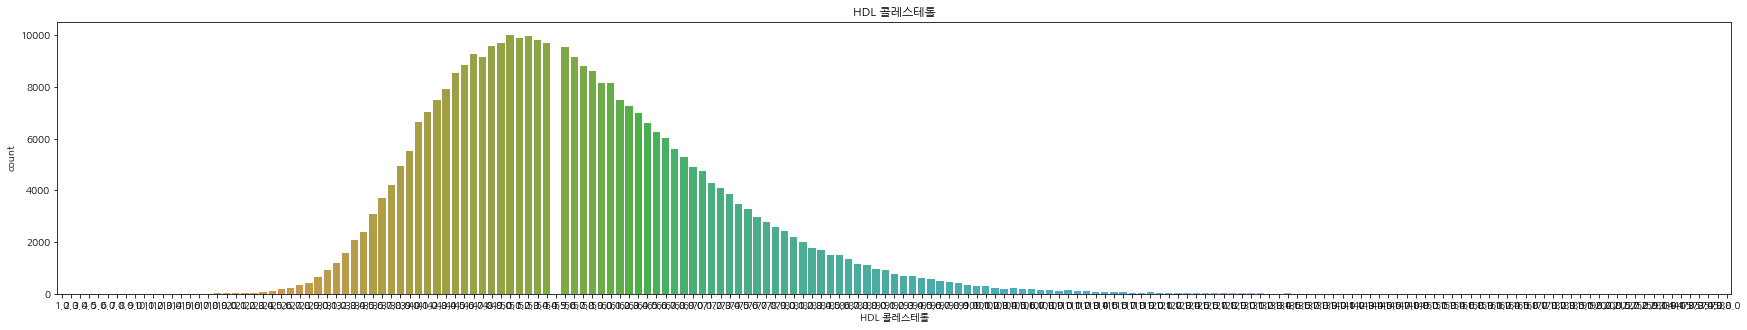

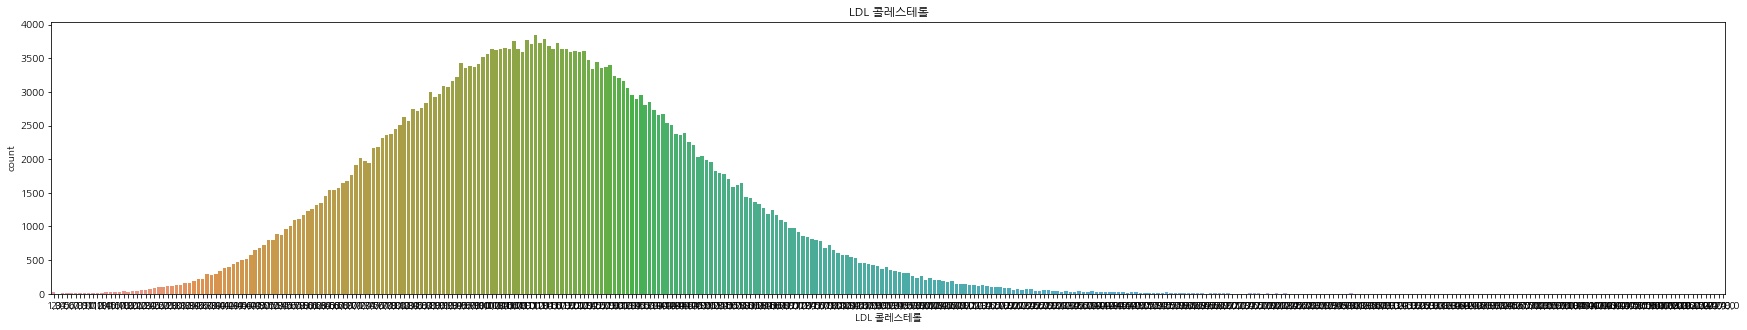

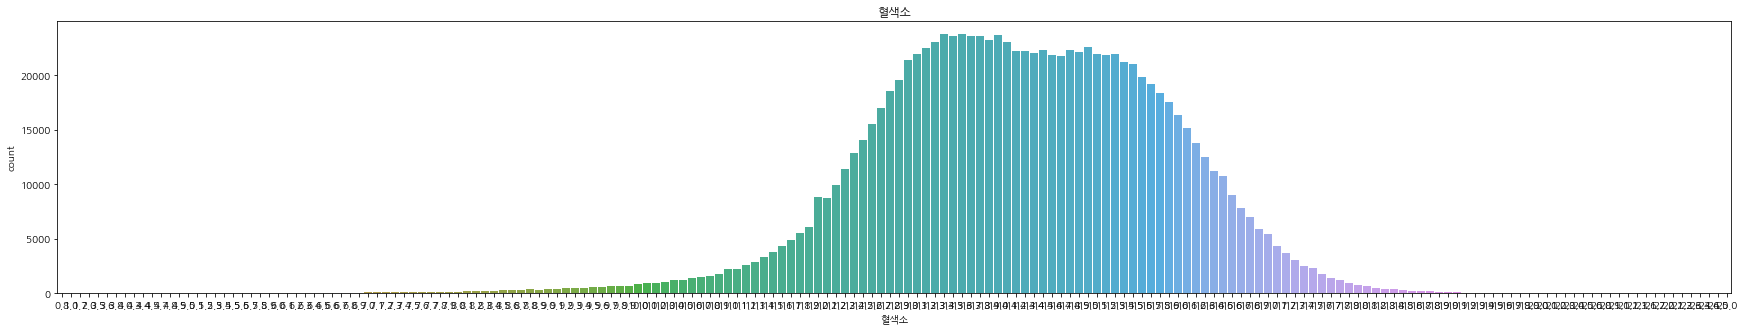

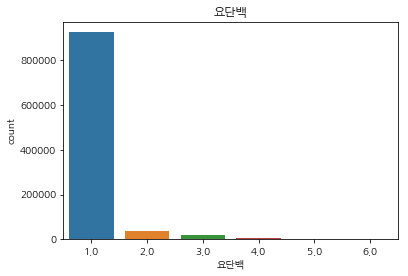

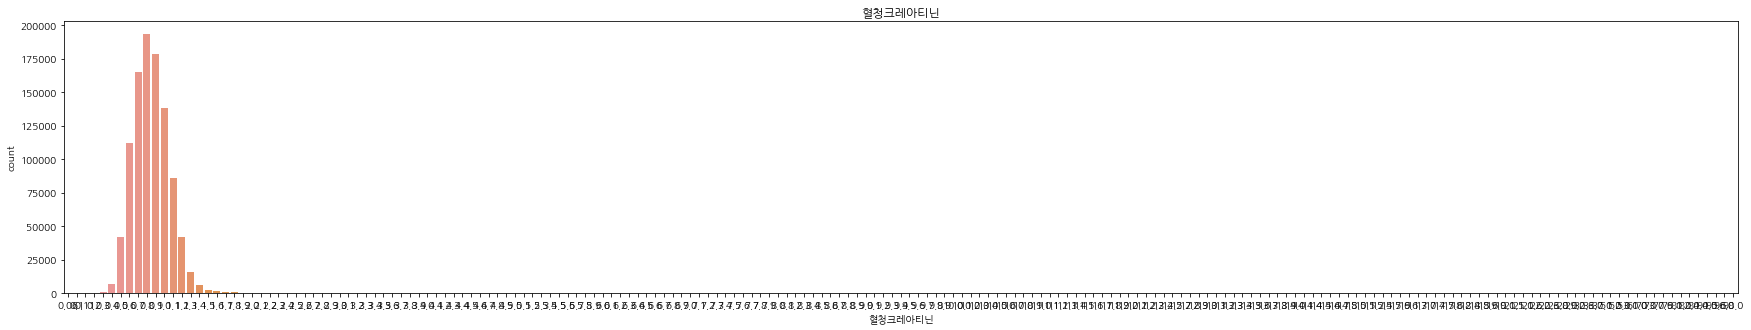

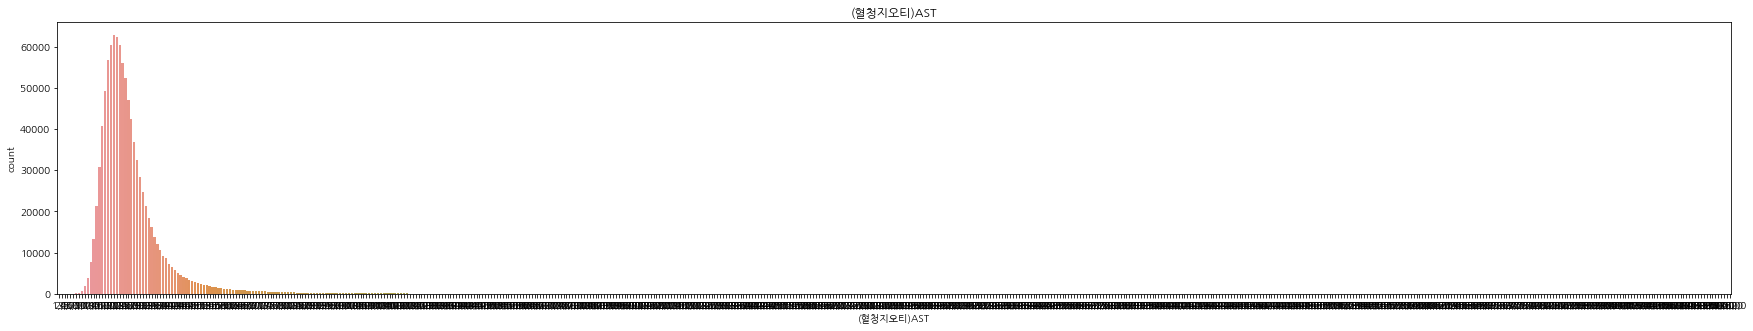

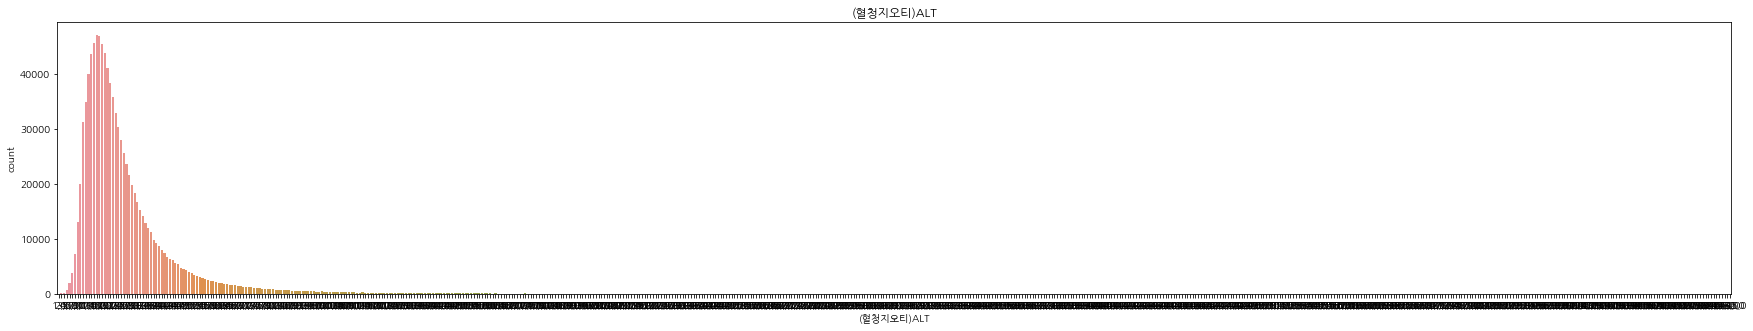

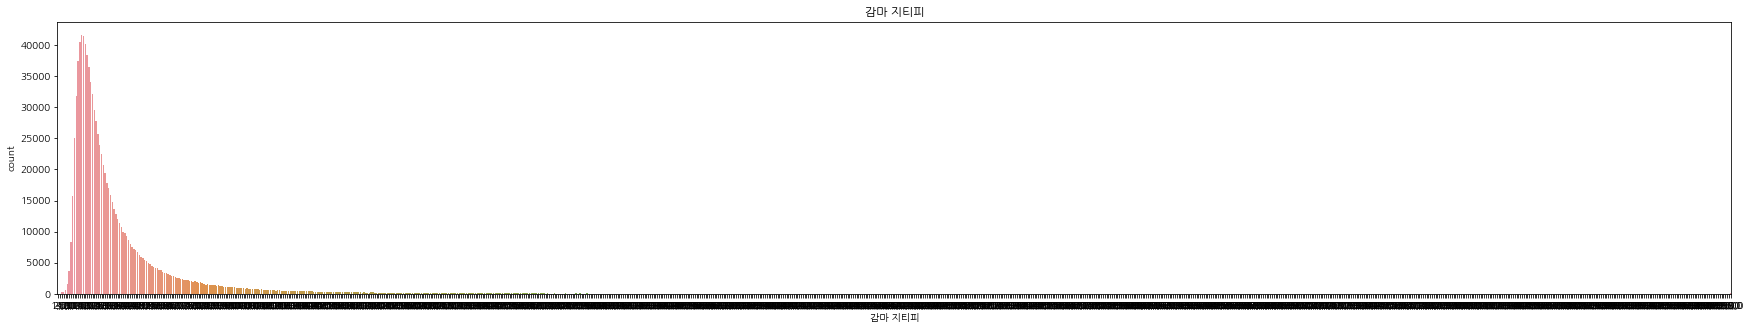

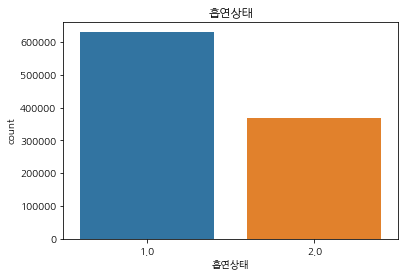

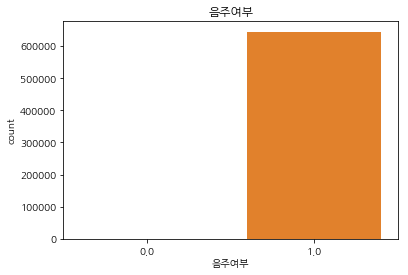

In [9]:
for c in df.columns:
    get_plot(c, df)

## null 값 정리

In [10]:
df.isnull().sum()

성별코드               0
연령대 코드             0
신장                 0
체중                 0
허리둘레             403
시력(좌)            195
시력(우)            188
청력(좌)            181
청력(우)            178
수축기 혈압          5424
이완기 혈압          5425
식전혈당            5523
총 콜레스테롤       666451
트리글리세라이드      666456
HDL 콜레스테롤     666459
LDL 콜레스테롤     672852
혈색소             5532
요단백            10306
혈청크레아티닌         5526
(혈청지오티)AST      5522
(혈청지오티)ALT      5523
감마 지티피          5530
흡연상태             166
음주여부          355082
dtype: int64

In [11]:
#너무 많은 결측치 값 드랍
df = df.drop(['총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤'], axis = 1)

In [12]:
#음주여부 데이터에 1만 있음. 0이 누락된 것으로 판단
df['음주여부'] = df['음주여부'].fillna(0)

In [13]:
#식전혈당이 없을 시 드랍
df = df.loc[df['식전혈당'].notnull()]

## 시력

In [14]:
#9.9 값 null 값 처리 후 평균으로 채움
df_eyes = df[['시력(좌)', '시력(우)']].copy()

In [15]:
df_eyes.loc[(df_eyes['시력(좌)']==9.9) | (df_eyes['시력(우)']==9.9)].shape[0]

5296

In [16]:
df_eyes.loc[df_eyes['시력(좌)'] == 9.9,'시력(좌)'] = np.nan
df_eyes.loc[df_eyes['시력(우)'] == 9.9,'시력(우)'] = np.nan

In [17]:
df_eyes.isnull().sum()

시력(좌)    3044
시력(우)    3147
dtype: int64

In [18]:
df_eyes['시력(좌)'] = df_eyes['시력(좌)'].fillna(round(df_eyes['시력(좌)'].mean(), 1))
df_eyes['시력(우)'] = df_eyes['시력(우)'].fillna(round(df_eyes['시력(우)'].mean(), 1))

In [19]:
df['시력(좌)'] = df_eyes['시력(좌)']
df['시력(우)'] = df_eyes['시력(우)']

In [20]:
df_eyes.isnull().sum()

시력(좌)    0
시력(우)    0
dtype: int64

## 청력

In [21]:
df_ear = df[['청력(좌)', '청력(우)']].copy()

In [22]:
#정상: 0 한쪽이 안 좋음:1 둘 다 안 좋음:2
df_ear.loc[(df_ear['청력(좌)'] == 1) & (df_ear['청력(우)'] == 1), '청력'] =0
df_ear.loc[(df_ear['청력(좌)'] == 2) & (df_ear['청력(우)'] == 1), '청력'] =1
df_ear.loc[(df_ear['청력(좌)'] == 1) & (df_ear['청력(우)'] == 2), '청력'] =1
df_ear.loc[(df_ear['청력(좌)'] == 2) & (df_ear['청력(우)'] == 2), '청력'] =2

In [23]:
df['청력'] = df_ear['청력']
df = df.drop(['청력(좌)', '청력(우)'], axis=1)

## 혈당에 따른 당뇨여부  

In [24]:
df_diabetes = df['식전혈당'].copy()

In [25]:
#당뇨병: 공복 혈당치 126 mg/dL 이상 당뇨병의 전단계: 공복 혈당치 100 mg/dL 이상
#저혈당: 혈당치 126 mg/dL 미만
df_diabetes.loc[df_diabetes < 100] = 0
df_diabetes.loc[(df_diabetes >= 100) & (df_diabetes < 126)] = 1
df_diabetes.loc[df_diabetes >= 126] = 2

In [26]:
df['당뇨코드'] = df_diabetes

## 복부비만

In [27]:
df.loc[((df['허리둘레']>=200) | (df['허리둘레']<=40)) & (df['당뇨코드']==2)].shape[0]

0

In [2]:
df.loc[((df['허리둘레']>=200) | (df['허리둘레']<=40))].shape[0]

NameError: name 'df' is not defined

In [28]:
#비정상적인 값 배제
df = df.loc[df['허리둘레']<200]
df = df.loc[df['허리둘레']>40]

In [29]:
#국내의 복부비만 기준은 남자는 90cm 이상, 여자의 경우 85cm 이상
df_obesity = df[['허리둘레','성별코드']].copy()

df_obesity.loc[(df_obesity['허리둘레']>= 90) & (df_obesity['성별코드']==1), '복부비만'] = 1
df_obesity.loc[(df_obesity['허리둘레']>= 85) & (df_obesity['성별코드']==2), '복부비만'] = 1
df_obesity['복부비만'] = df_obesity['복부비만'].fillna(0)

In [30]:
df['복부비만'] = df_obesity['복부비만']

## BMI

In [31]:
df_weight = df[['신장', '체중']].copy()

In [32]:
#체중(kg)을 신장(m)의 제곱으로 나눈 값(체중(kg)/신장(m2))
temp = df_weight['신장']/100
df_bmi = round(df_weight['체중'] / (temp * temp), 1)
df_bmi2 = df_bmi.copy()

In [33]:
#세계보건기구 아시아태평양지역과 대한비만학회
#BMI ≥ 23 kg/m2 : 과체중
#BMI ≥ 25 kg/m2 : 비만
df_bmi.loc[df_bmi < 23] = 0
df_bmi.loc[(df_bmi >= 23) & (df_bmi < 25)] = 1
df_bmi.loc[df_bmi >= 25] = 2

In [34]:
df['BMI'] = df_bmi2
df['BMI코드'] = df_bmi

In [35]:
df = df.drop(['체중', '신장'], axis = 1)

## 고혈압

In [36]:
df_pressure = df[['이완기 혈압', '수축기 혈압']].copy()

In [37]:
#고혈압 수치는 수축기 혈압 기준 140mmHg 이상 혹은 이완기 혈압 90mmHg 이상
df_pressure.loc[(df_pressure['수축기 혈압'] >= 140) | (df_pressure['이완기 혈압'] >= 90), '고혈압 여부'] = 1
df_pressure.loc[(df_pressure['수축기 혈압'] < 140) & (df_pressure['이완기 혈압'] < 90), '고혈압 여부'] = 0

In [38]:
df['고혈압여부'] = df_pressure['고혈압 여부']

# 중간점검

In [39]:
df.head()

,성별코드,연령대 코드,허리둘레,시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,청력,당뇨코드,복부비만,BMI,BMI코드,고혈압여부
0,1,13,90.0,1.5,1.2,112.0,70.0,93.0,15.5,1.0,1.0,18.0,32.0,47.0,2.0,0.0,0.0,0.0,1.0,23.9,1.0,0.0
1,2,5,64.0,1.2,0.5,114.0,76.0,89.0,14.0,1.0,0.5,15.0,8.0,13.0,1.0,1.0,0.0,0.0,0.0,18.7,0.0,0.0
2,1,13,87.0,0.9,0.8,109.0,73.0,100.0,15.6,1.0,1.0,30.0,21.0,17.0,1.0,1.0,0.0,1.0,0.0,27.3,2.0,0.0
3,1,12,85.0,0.4,1.2,131.0,85.0,85.0,14.5,1.0,0.7,17.0,19.0,32.0,2.0,1.0,0.0,0.0,0.0,20.8,0.0,0.0
4,1,10,81.2,0.7,0.7,112.0,66.0,91.0,14.9,1.0,0.9,19.0,24.0,19.0,2.0,0.0,0.0,0.0,0.0,24.2,1.0,0.0


In [40]:
df.isnull().sum()

성별코드             0
연령대 코드           0
허리둘레             0
시력(좌)            0
시력(우)            0
수축기 혈압          11
이완기 혈압          12
식전혈당             0
혈색소             12
요단백           4806
혈청크레아티닌          4
(혈청지오티)AST       1
(혈청지오티)ALT       2
감마 지티피           8
흡연상태           165
음주여부             0
청력             165
당뇨코드             0
복부비만             0
BMI              0
BMI코드            0
고혈압여부           12
dtype: int64

In [41]:
df_diabetes = df.loc[df['당뇨코드']==2]
df_not_diabetes = df.loc[df['당뇨코드']!=2]

In [42]:
print(df_diabetes.shape[0], df_not_diabetes.shape[0])

77754 916302


In [43]:
df_diabetes.isnull().sum()

성별코드            0
연령대 코드          0
허리둘레            0
시력(좌)           0
시력(우)           0
수축기 혈압          1
이완기 혈압          1
식전혈당            0
혈색소             0
요단백           519
혈청크레아티닌         0
(혈청지오티)AST      0
(혈청지오티)ALT      1
감마 지티피          2
흡연상태           14
음주여부            0
청력             10
당뇨코드            0
복부비만            0
BMI             0
BMI코드           0
고혈압여부           1
dtype: int64

In [44]:
df_not_diabetes.isnull().sum()

성별코드             0
연령대 코드           0
허리둘레             0
시력(좌)            0
시력(우)            0
수축기 혈압          10
이완기 혈압          11
식전혈당             0
혈색소             12
요단백           4287
혈청크레아티닌          4
(혈청지오티)AST       1
(혈청지오티)ALT       1
감마 지티피           6
흡연상태           151
음주여부             0
청력             155
당뇨코드             0
복부비만             0
BMI              0
BMI코드            0
고혈압여부           11
dtype: int64

## 시각화

In [45]:
def get_compare_plot(column_name, df, hue="당뇨코드"):
    if(df[column_name].value_counts().shape[0]) > 100:
        plt.figure(figsize=(30,5))
    sns.countplot(x=column_name, hue = hue, data=df)
    plt.title(column_name)
    plt.show()

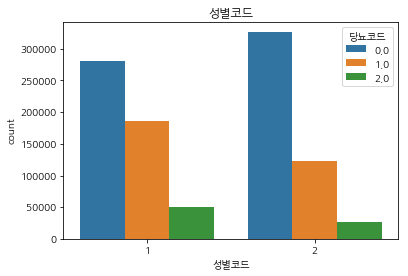

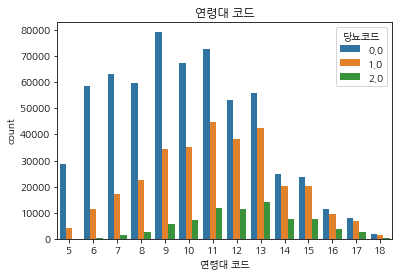

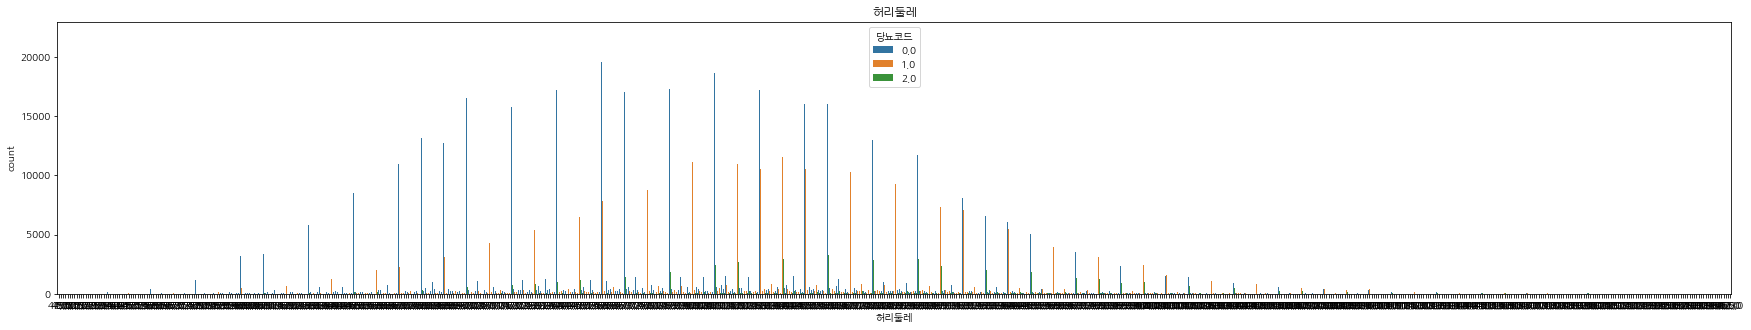

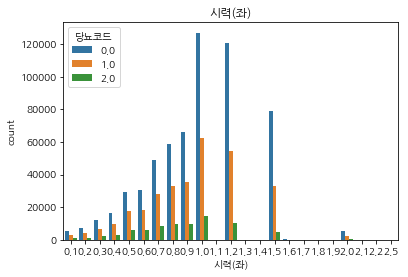

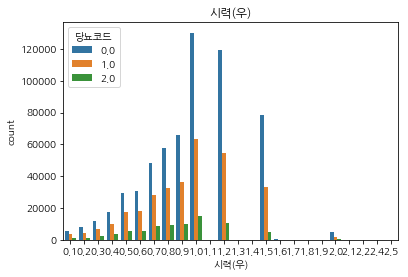

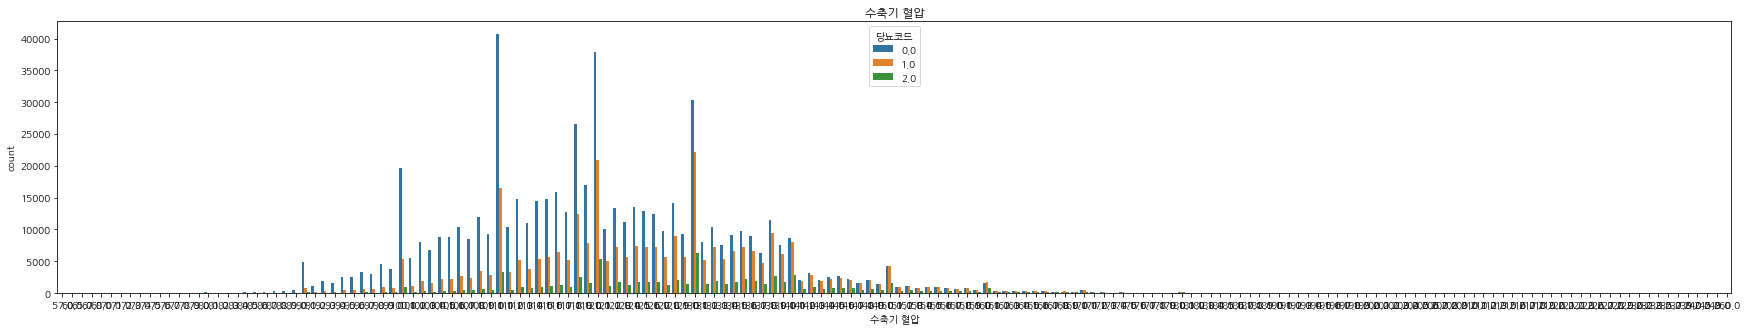

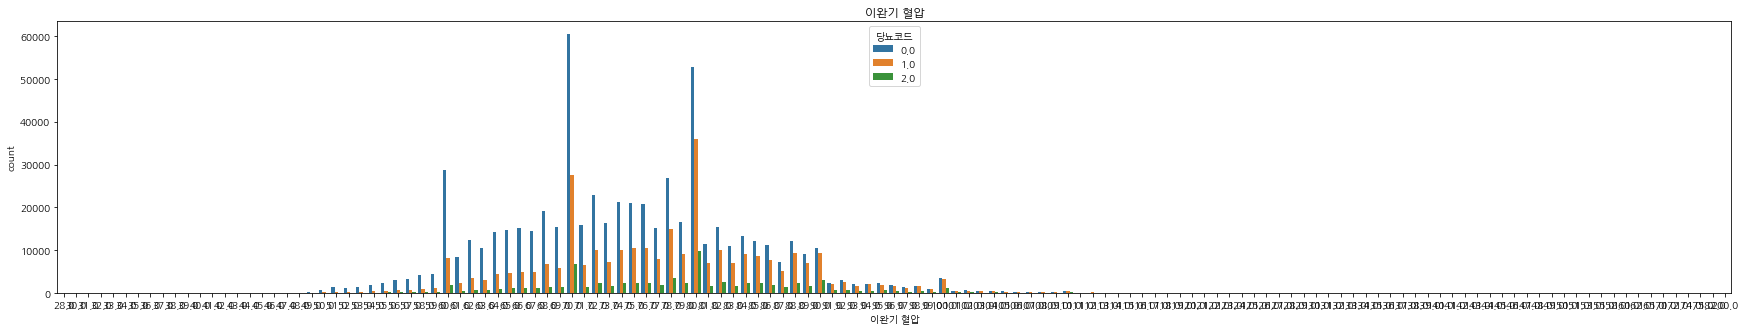

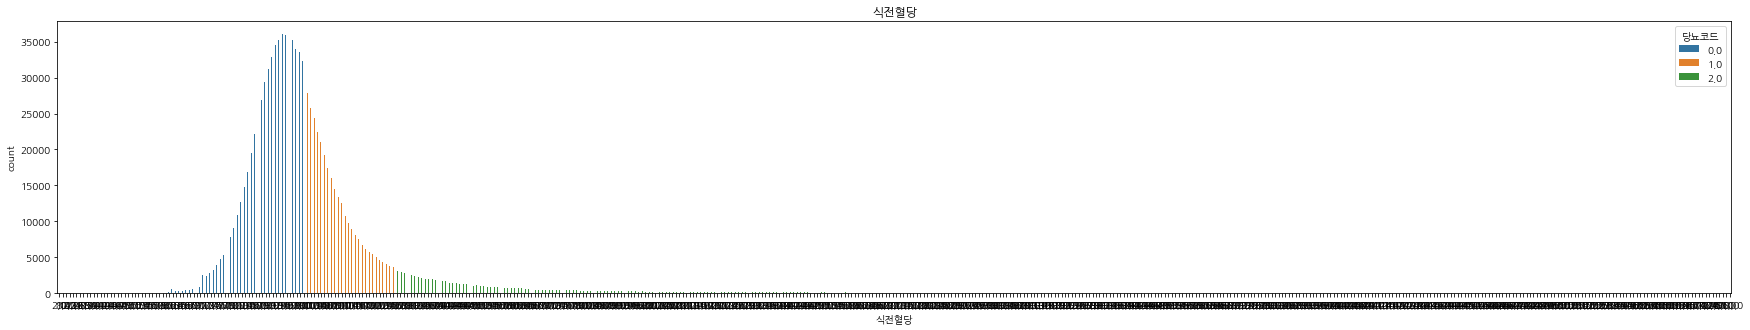

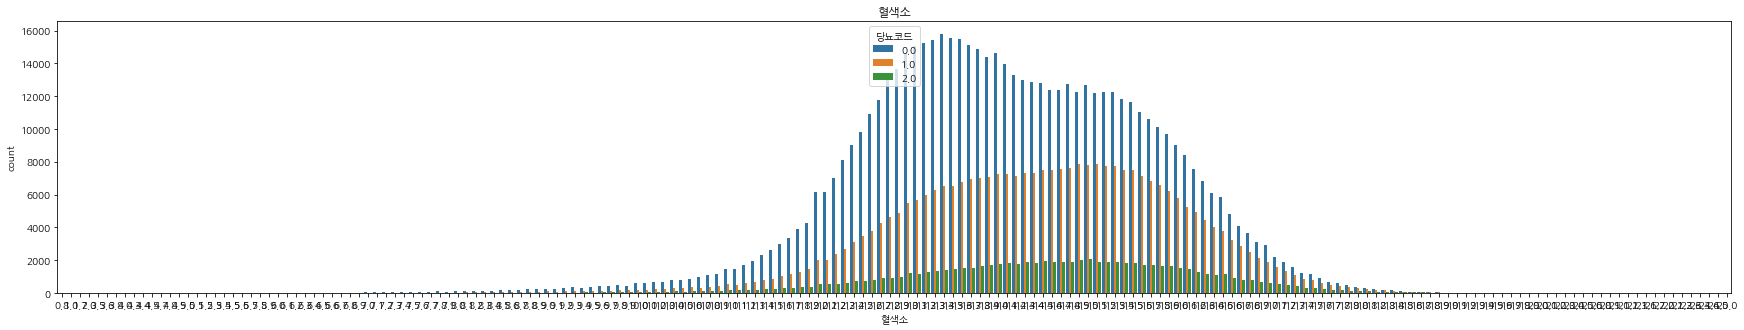

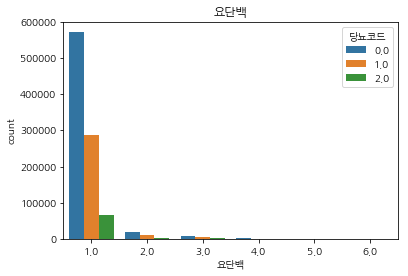

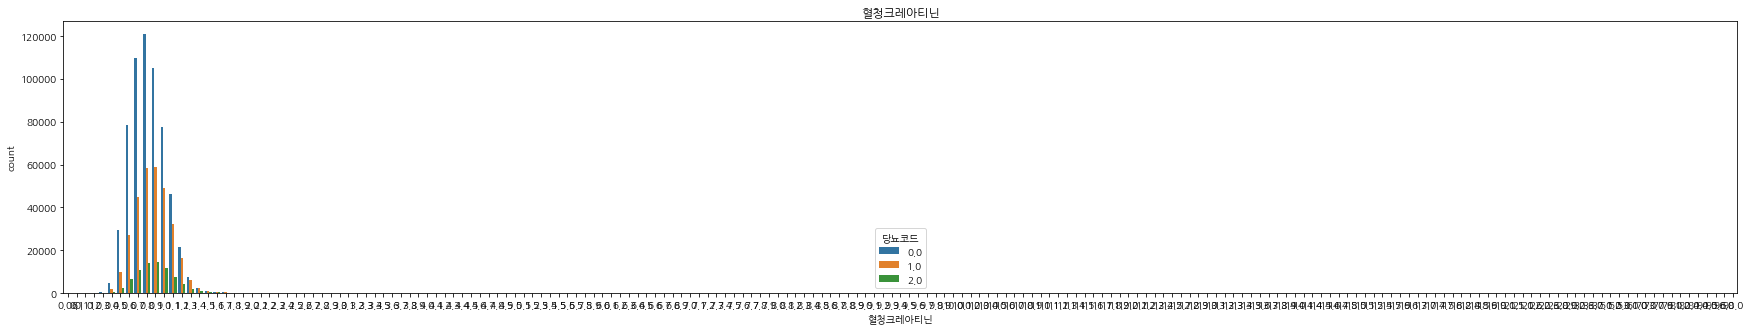

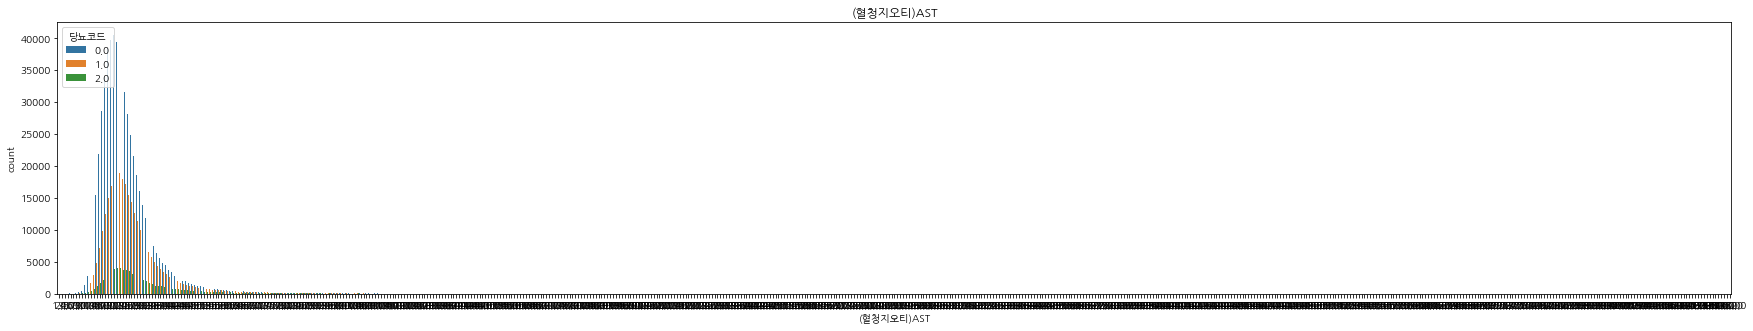

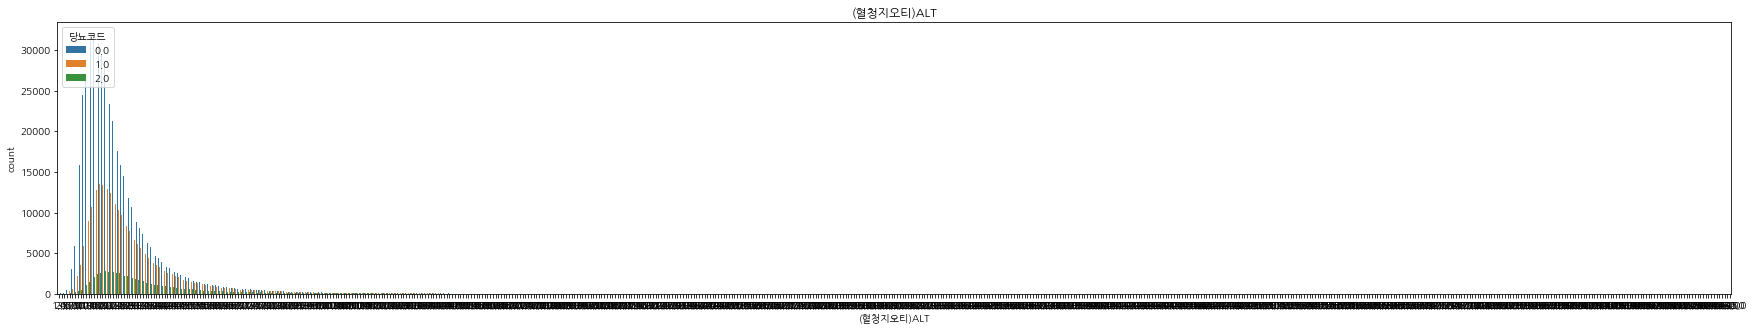

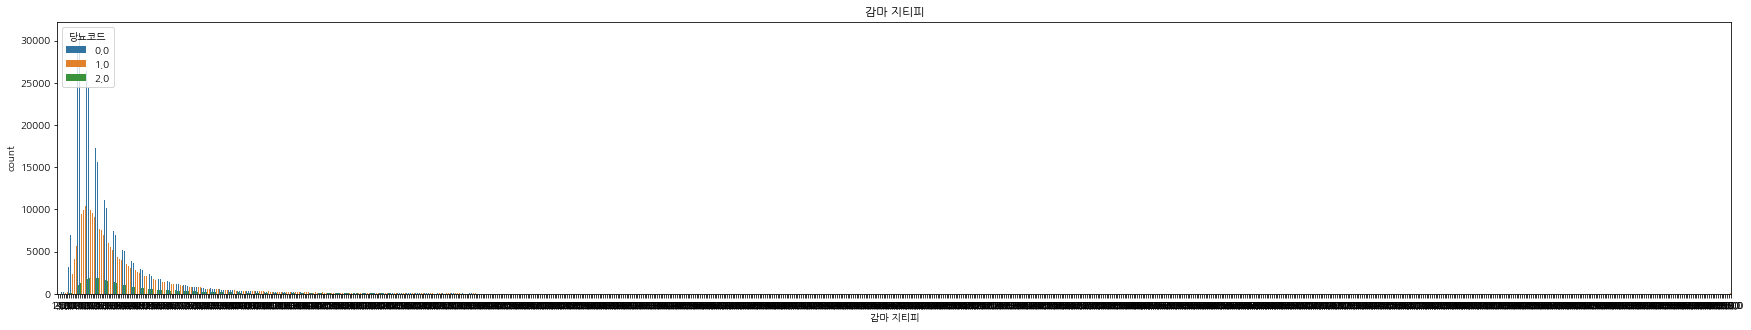

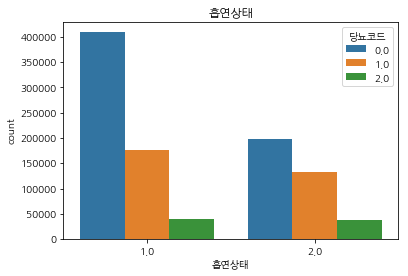

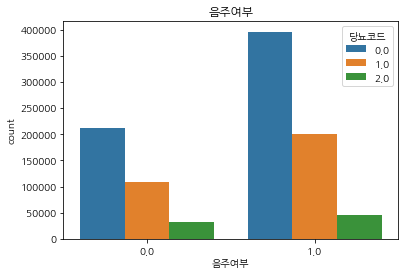

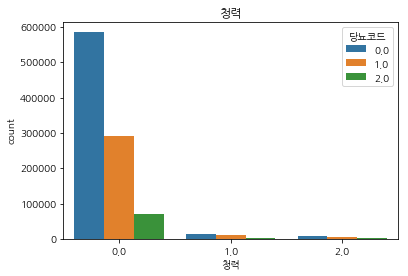

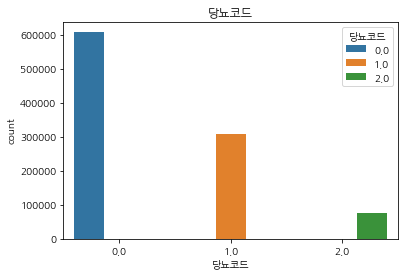

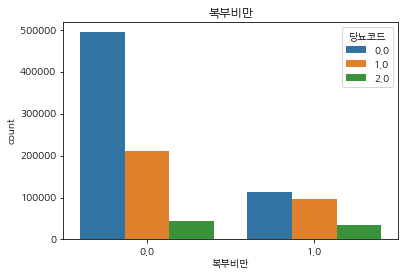

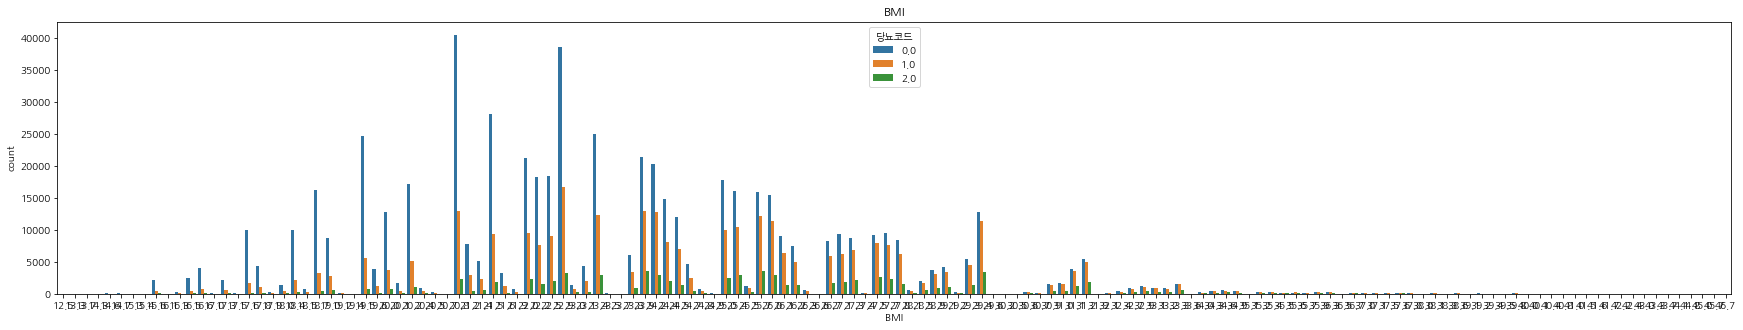

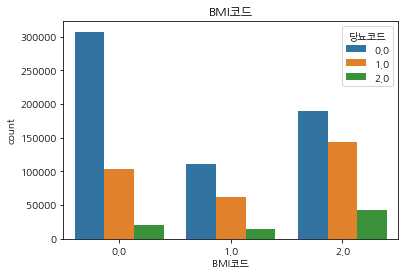

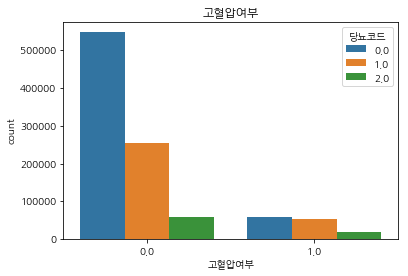

In [46]:
for c in df.columns:
    get_compare_plot(c, df)

## 성별에 따른 분류

In [47]:
df_male = df.loc[df['성별코드']==1].copy()
df_female = df.loc[df['성별코드']==2].copy()

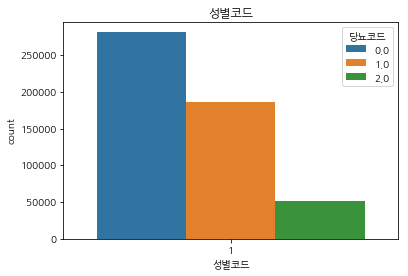

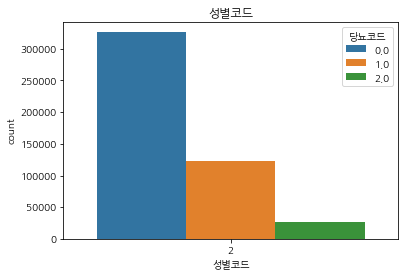

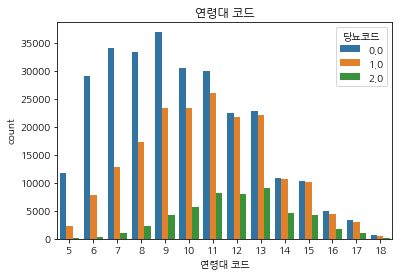

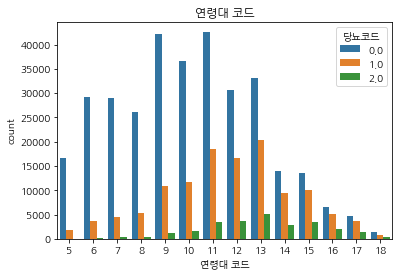

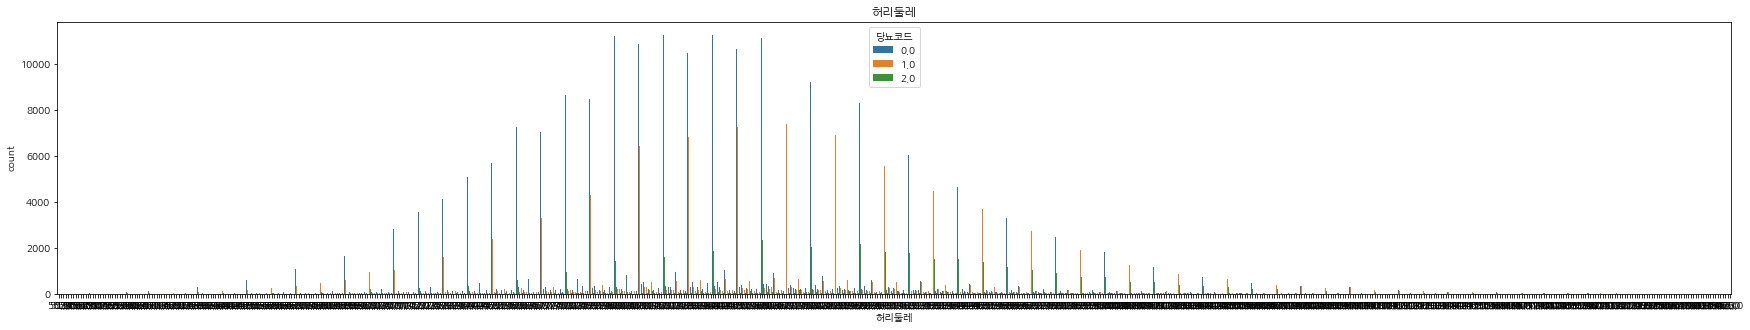

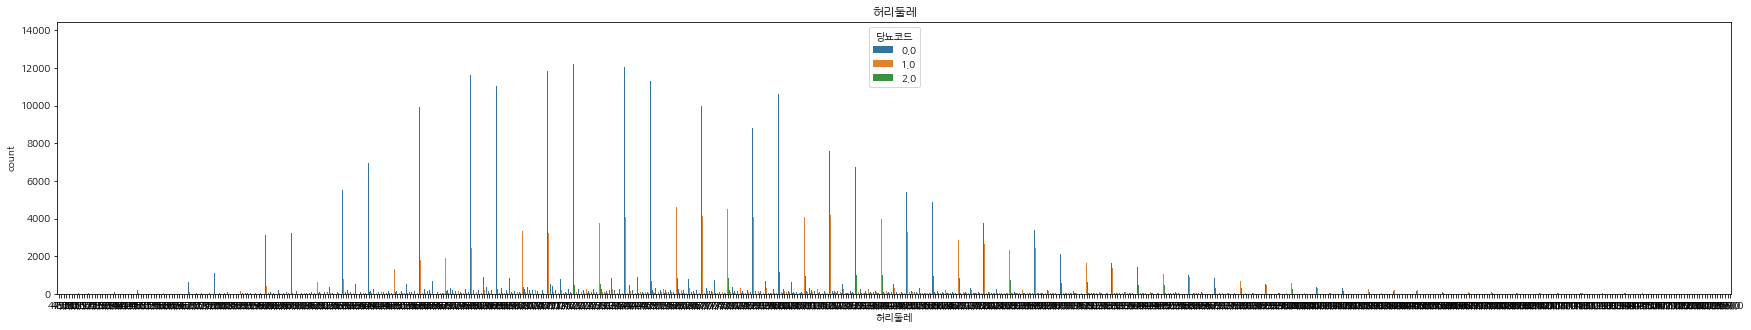

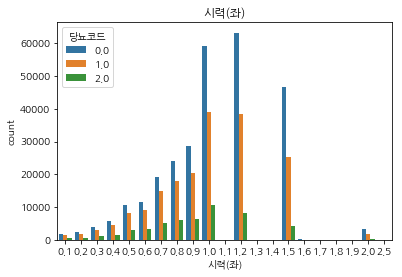

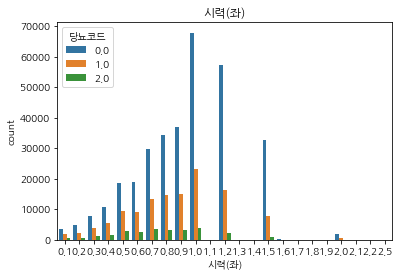

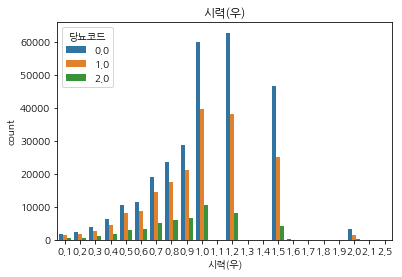

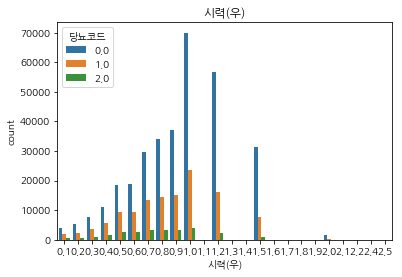

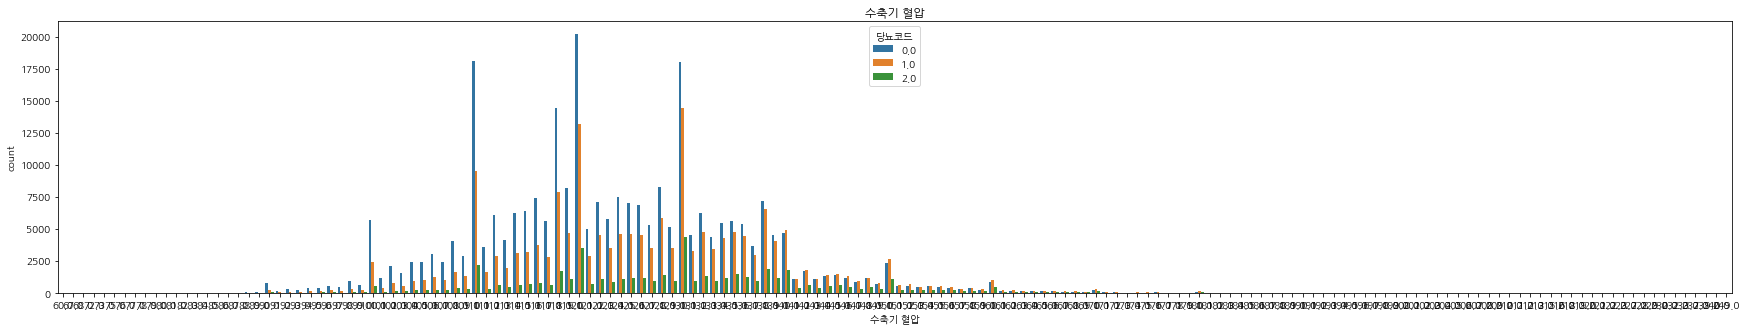

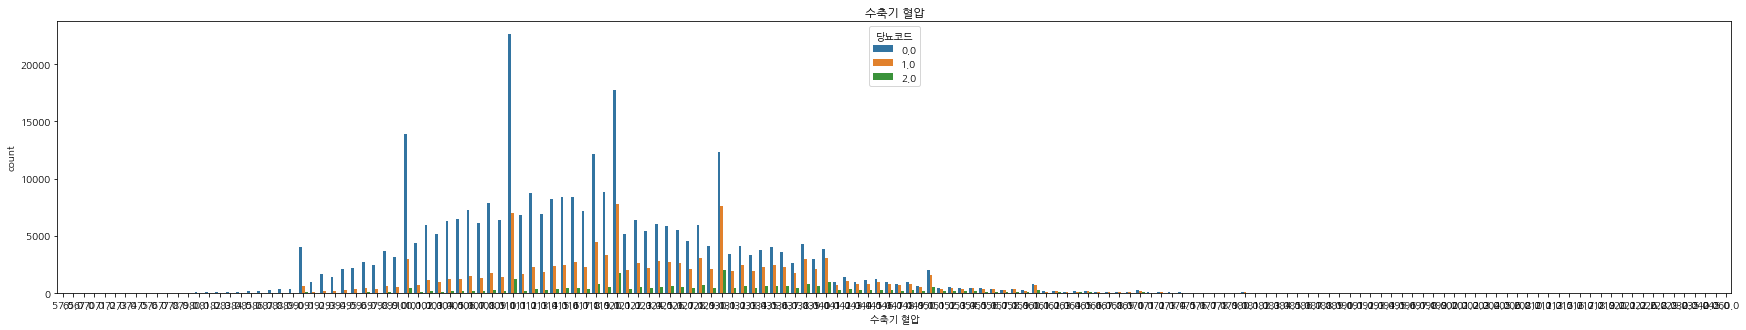

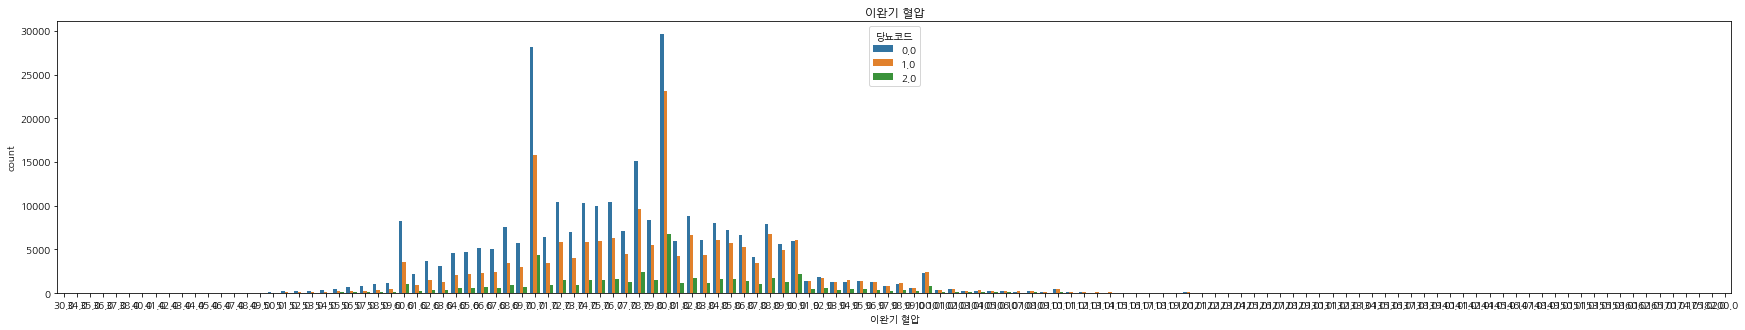

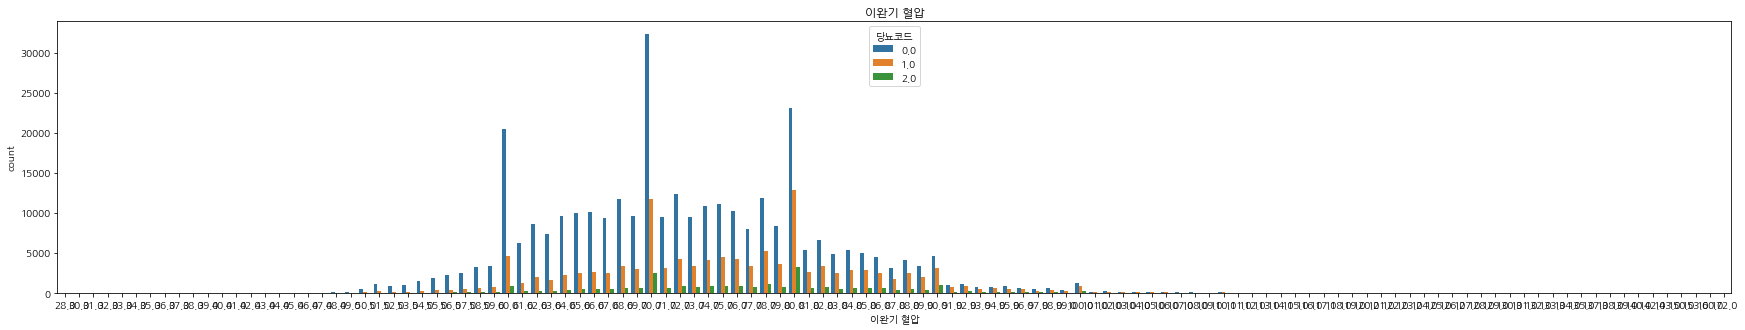

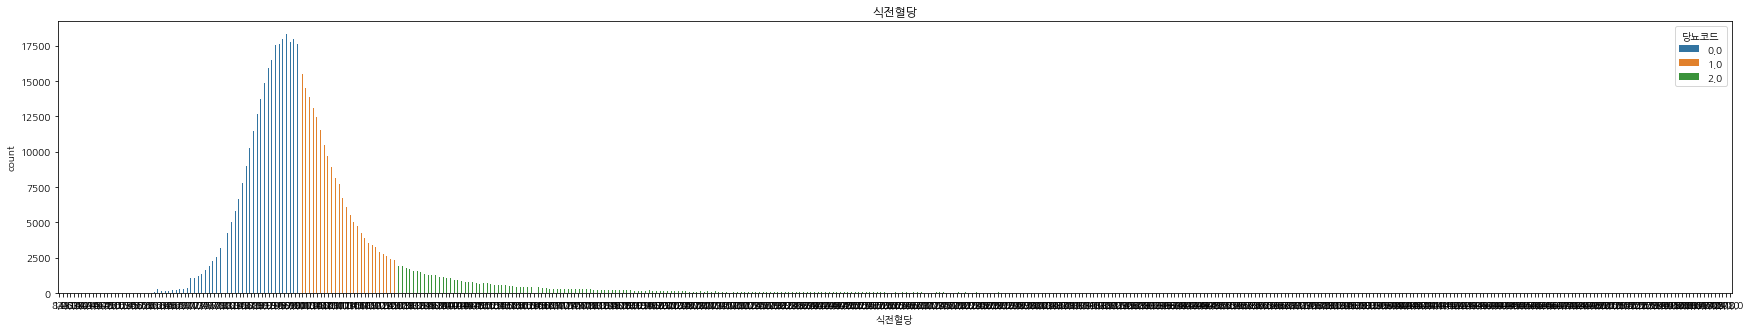

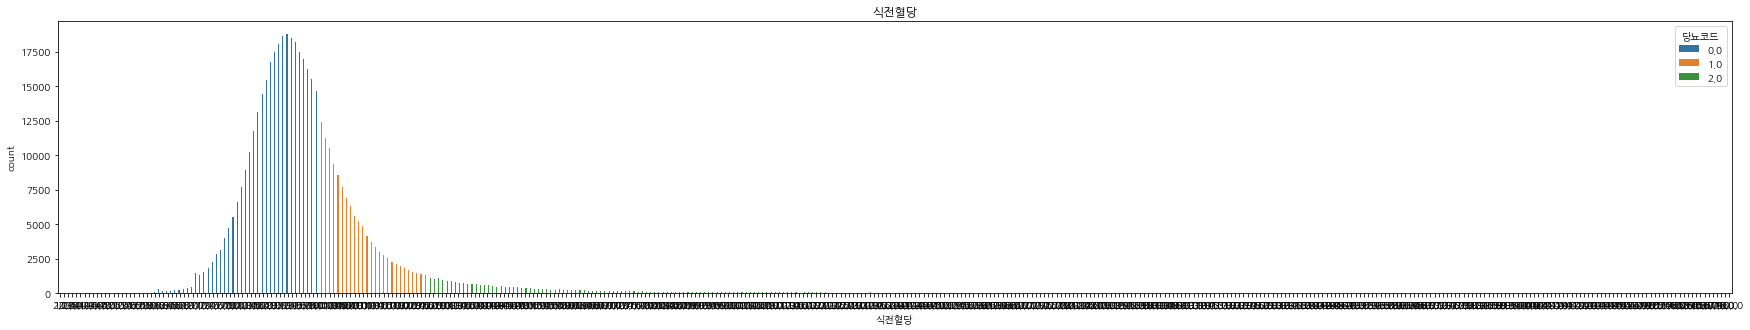

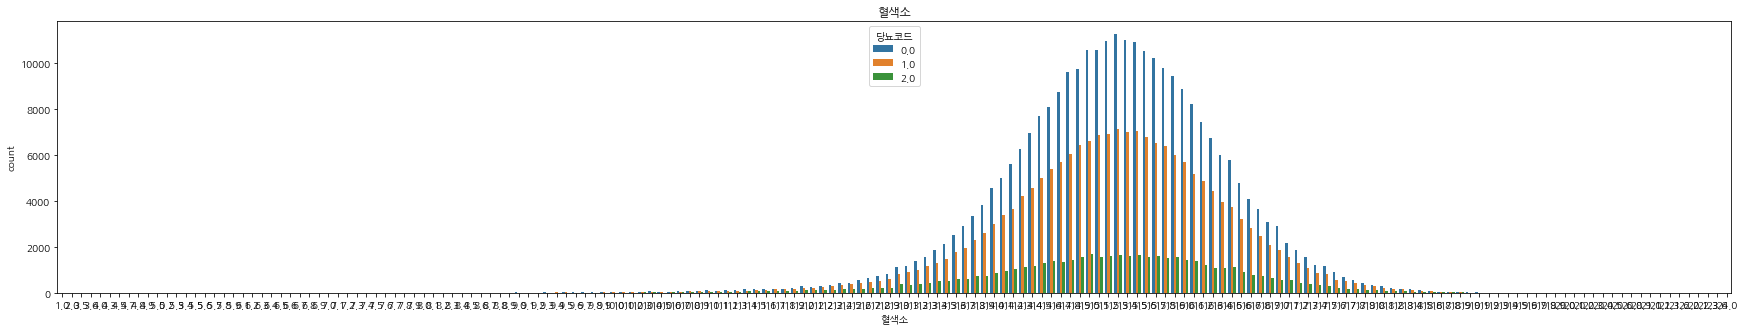

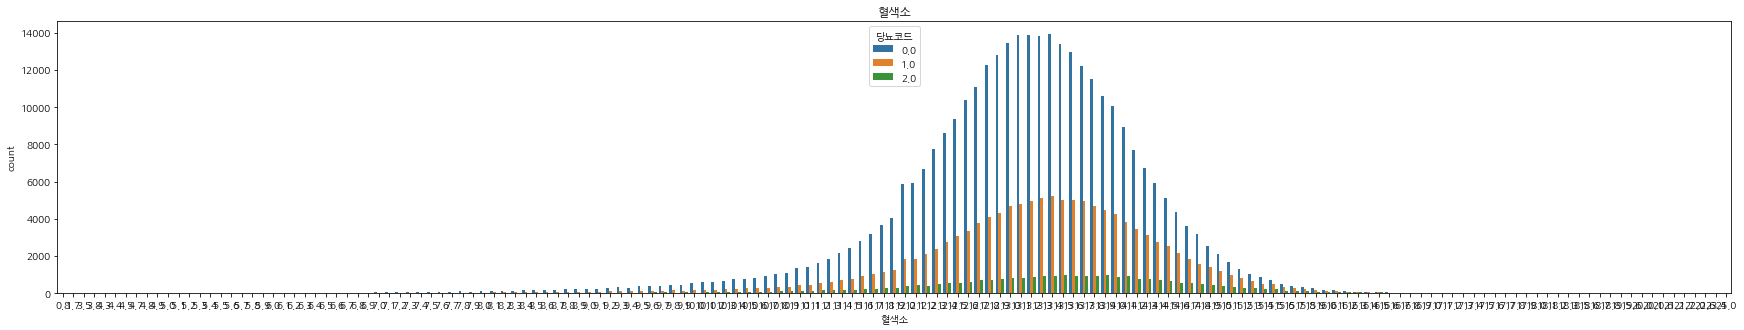

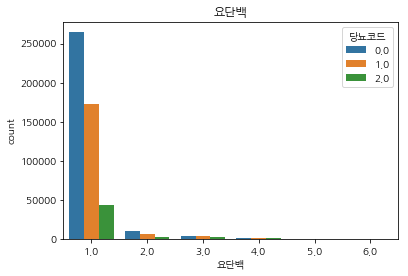

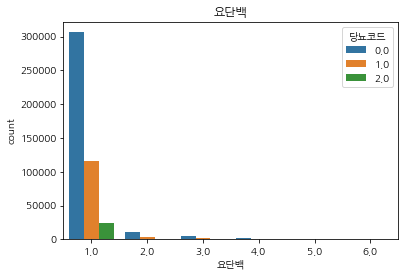

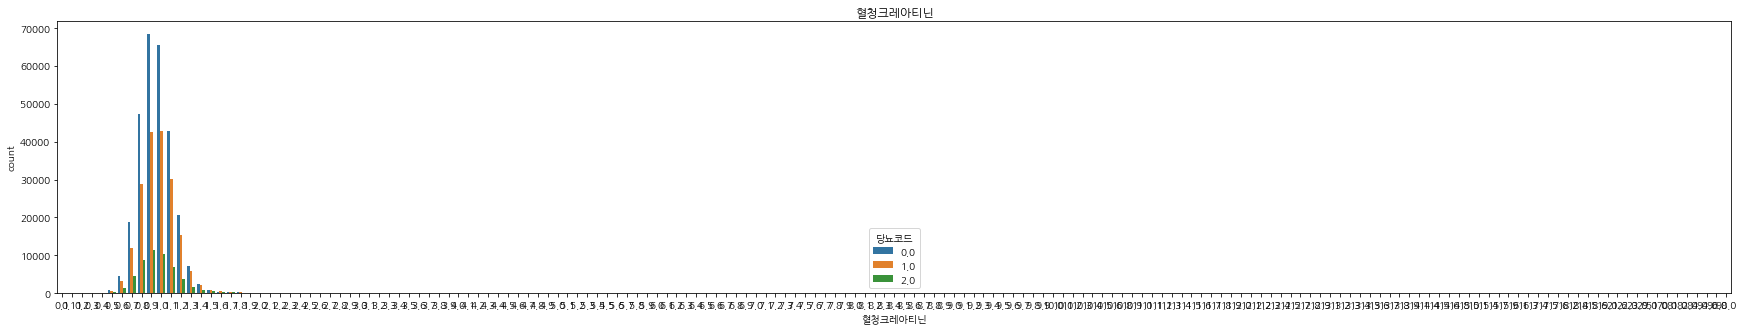

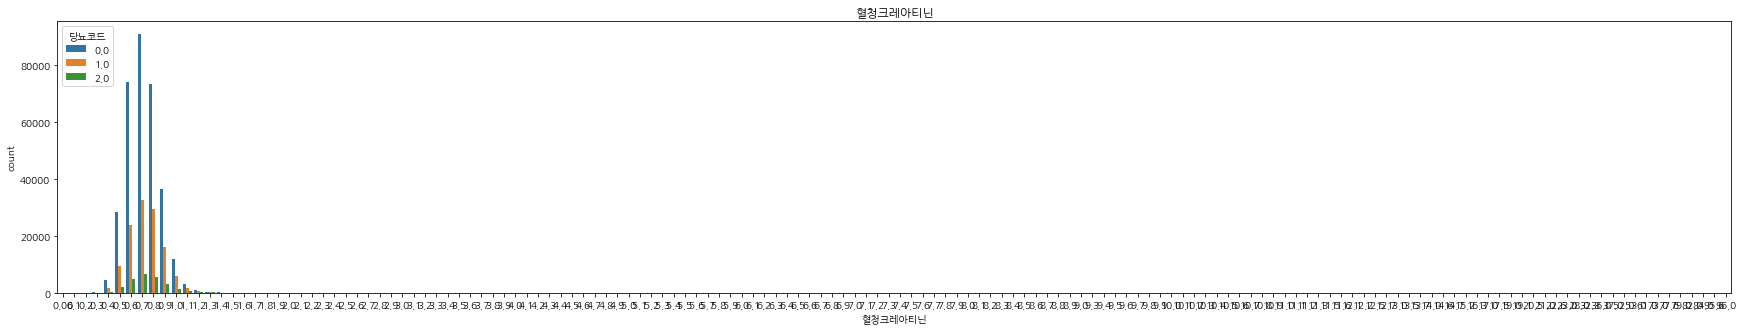

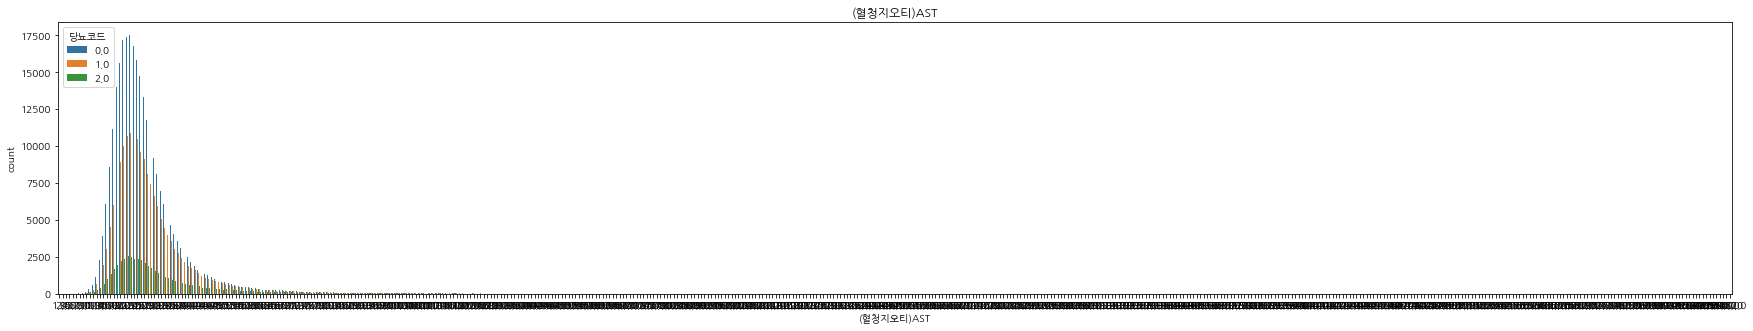

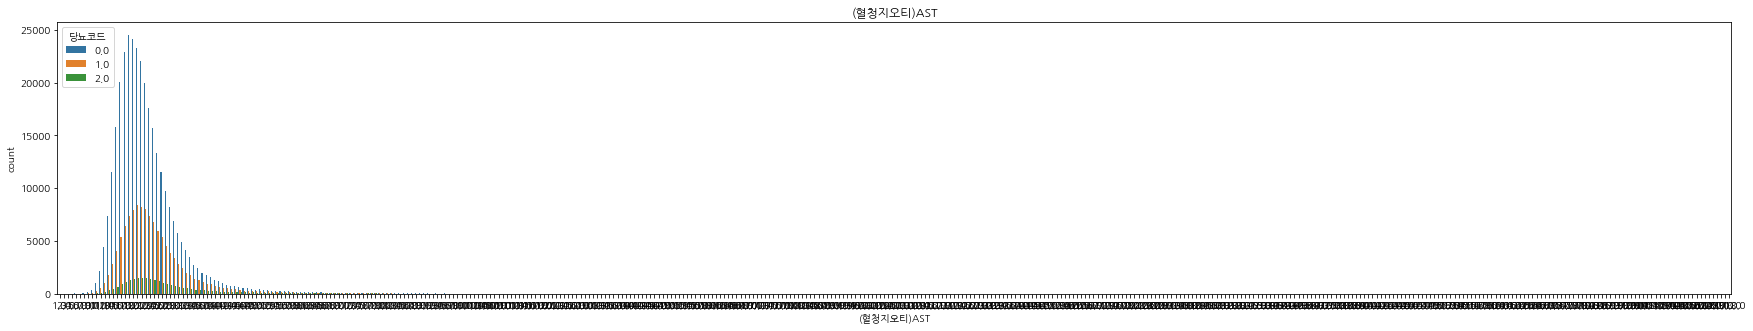

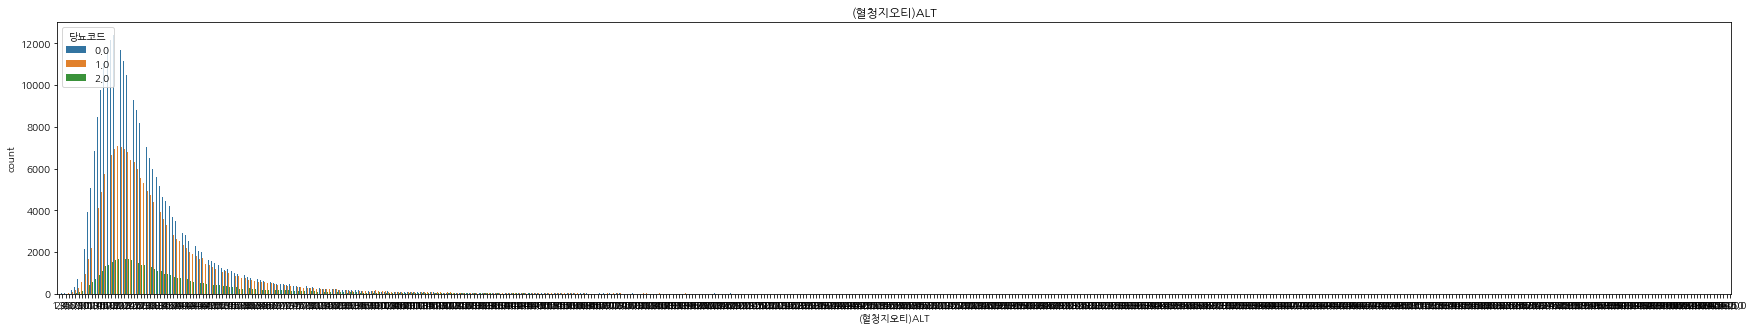

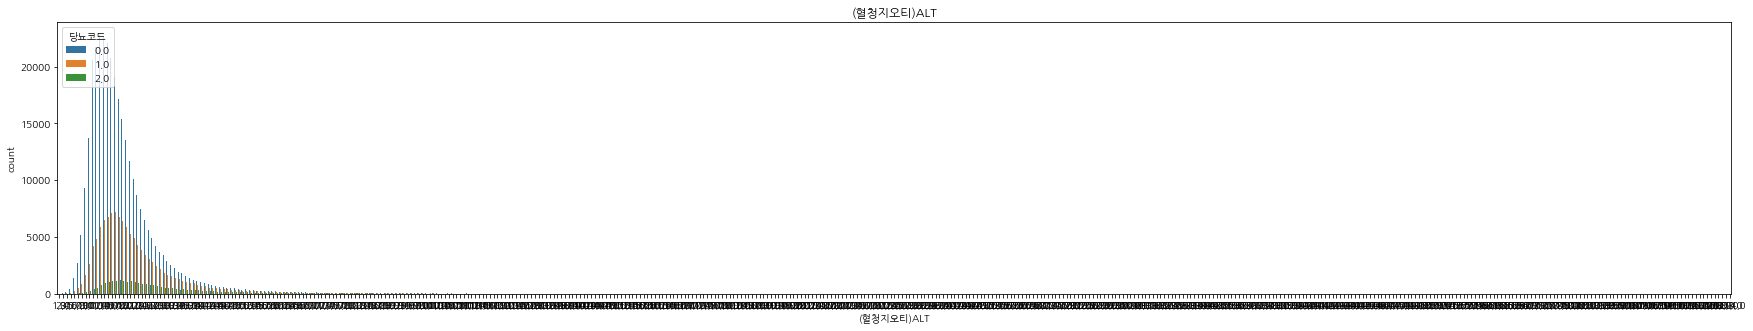

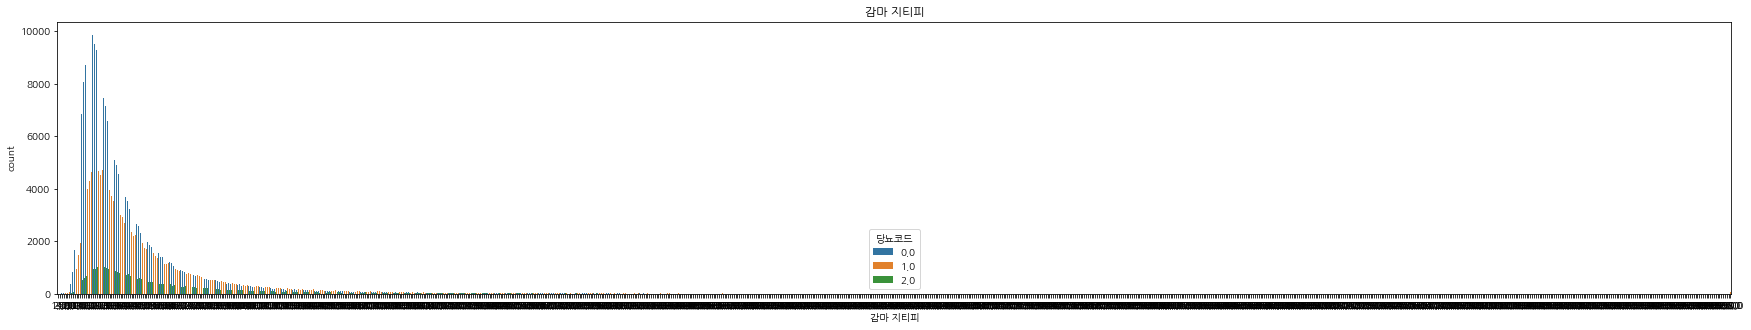

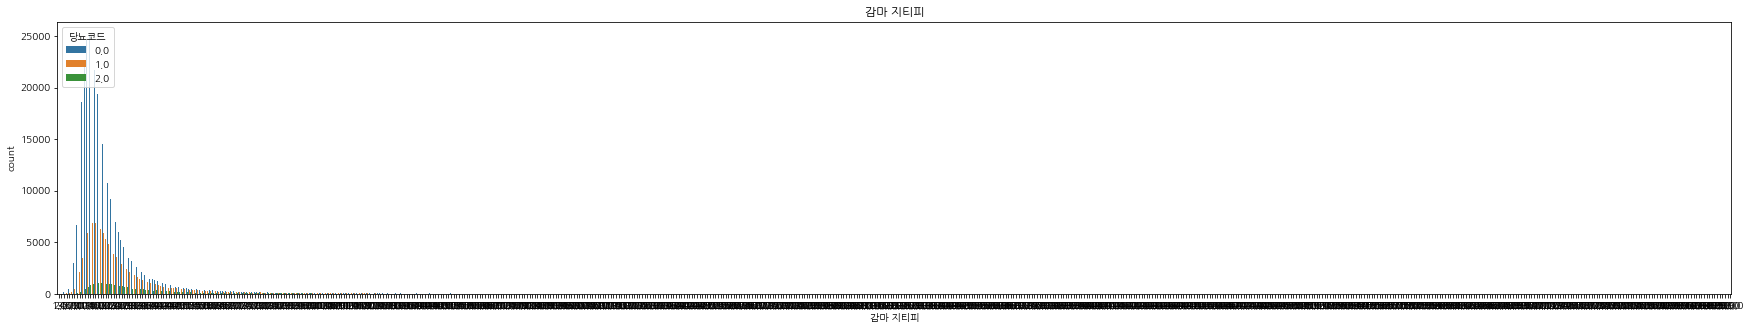

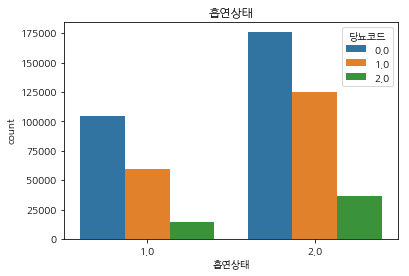

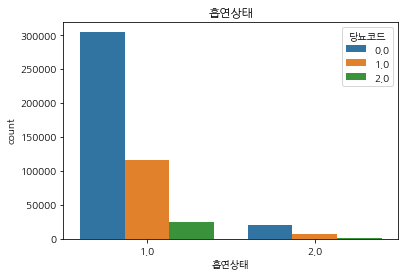

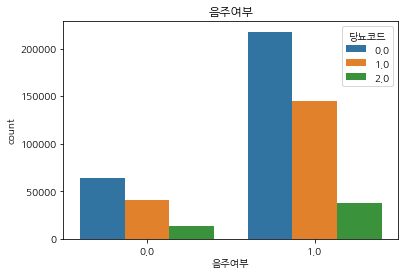

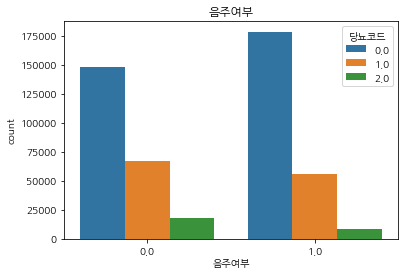

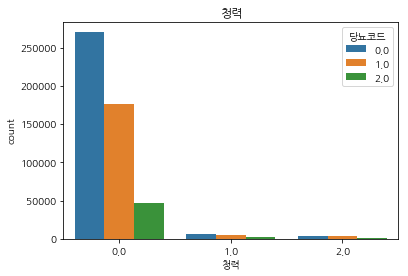

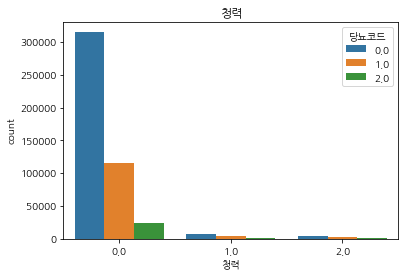

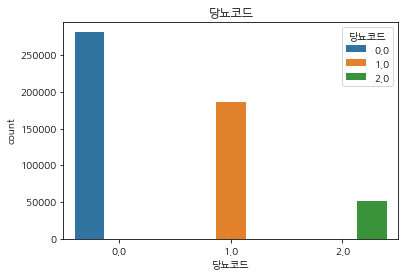

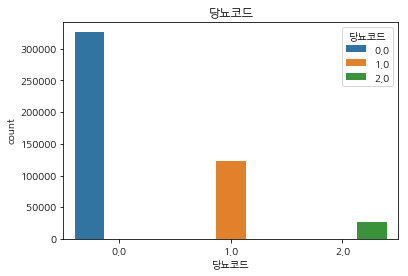

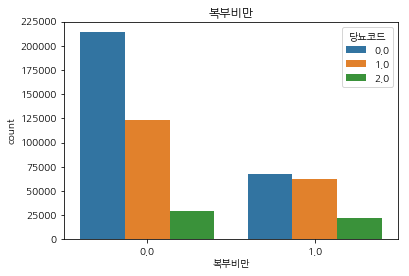

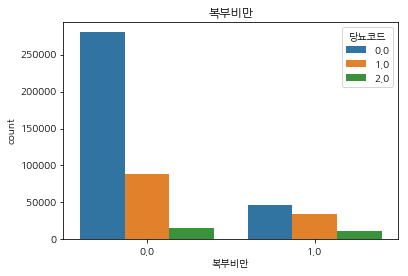

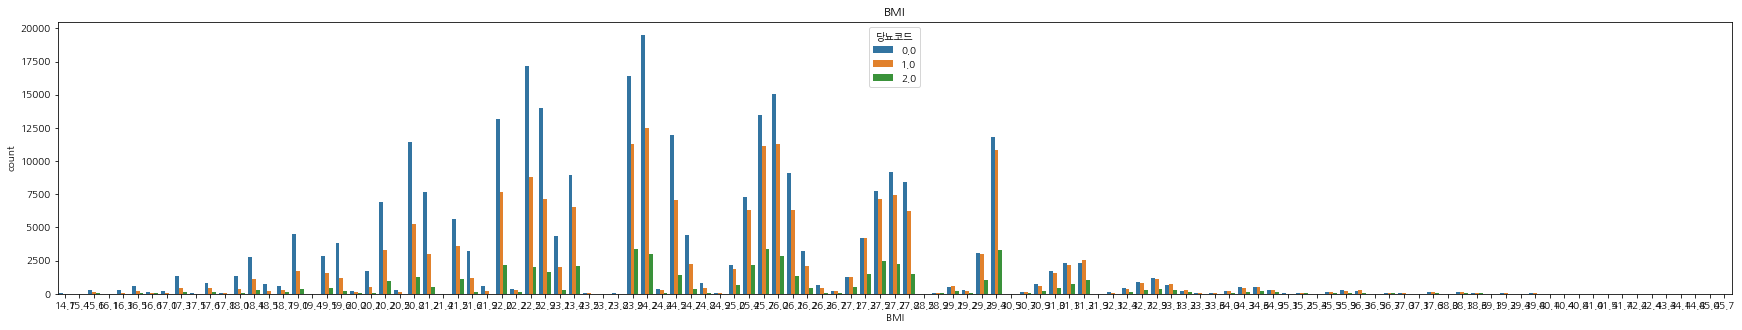

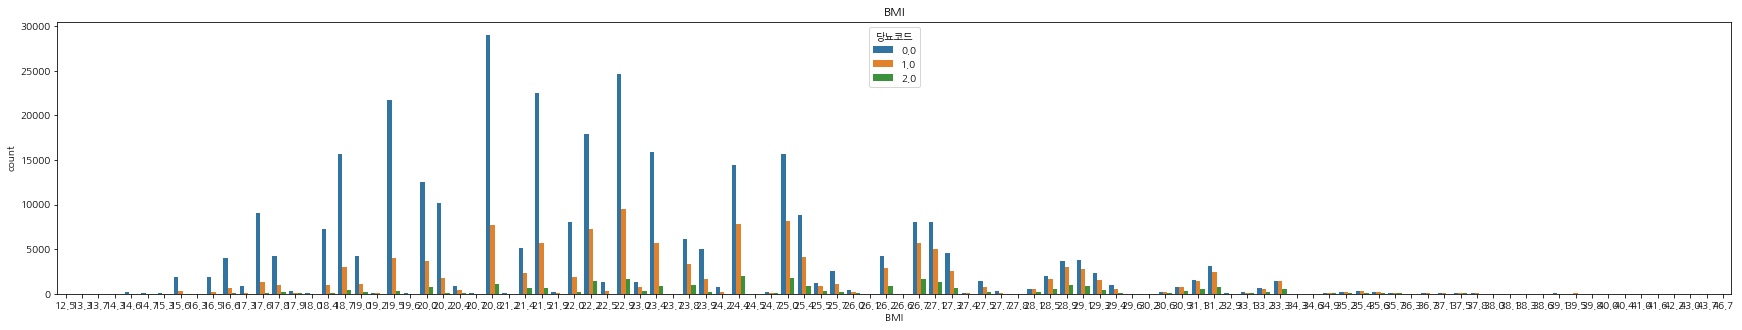

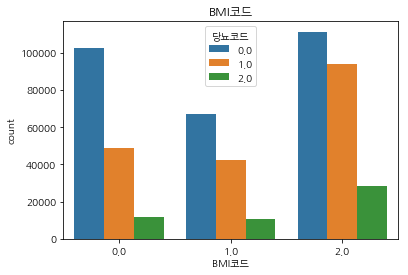

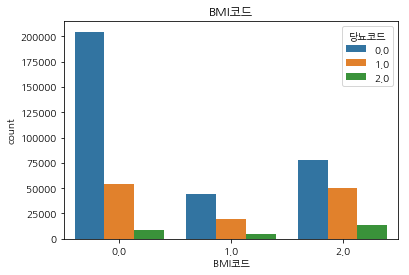

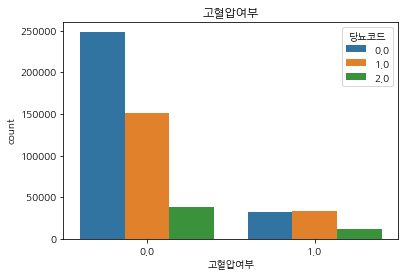

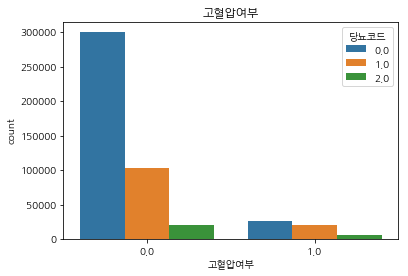

In [48]:
for c in df.columns:
    get_compare_plot(c, df_male)
    get_compare_plot(c, df_female)

## 상관관계 분석

In [49]:
df_corr = df.corr()
df_corr_male = df_male.corr()
df_corr_female = df_female.corr()

In [50]:
df_corr['당뇨코드'].sort_values(ascending=False)

당뇨코드          1.000000
식전혈당          0.760462
허리둘레          0.265634
연령대 코드        0.256582
수축기 혈압        0.220827
BMI           0.209581
BMI코드         0.194933
복부비만          0.184626
감마 지티피        0.180244
이완기 혈압        0.163688
고혈압여부         0.143545
(혈청지오티)ALT    0.122334
흡연상태          0.120615
혈색소           0.115613
요단백           0.087812
(혈청지오티)AST    0.077882
청력            0.060990
혈청크레아티닌       0.058138
음주여부         -0.021871
시력(우)        -0.090420
시력(좌)        -0.093286
성별코드         -0.145157
Name: 당뇨코드, dtype: float64

In [51]:
df_corr_male['당뇨코드'].sort_values(ascending=False)

당뇨코드          1.000000
식전혈당          0.750819
연령대 코드        0.253285
허리둘레          0.180462
수축기 혈압        0.162431
감마 지티피        0.156728
복부비만          0.140780
BMI           0.132838
BMI코드         0.131213
고혈압여부         0.122104
이완기 혈압        0.116928
요단백           0.105756
(혈청지오티)ALT    0.078972
흡연상태          0.064237
(혈청지오티)AST    0.055711
청력            0.048785
혈청크레아티닌       0.013528
음주여부         -0.013903
혈색소          -0.016806
시력(우)        -0.102450
시력(좌)        -0.103609
성별코드               NaN
Name: 당뇨코드, dtype: float64

In [52]:
df_corr_female['당뇨코드'].sort_values(ascending=False)

당뇨코드          1.000000
식전혈당          0.766836
연령대 코드        0.288698
허리둘레          0.281757
수축기 혈압        0.243953
BMI           0.240675
BMI코드         0.215021
복부비만          0.213768
이완기 혈압        0.163642
고혈압여부         0.156164
감마 지티피        0.149262
(혈청지오티)ALT    0.128900
(혈청지오티)AST    0.084189
혈색소           0.080320
청력            0.076966
요단백           0.055850
혈청크레아티닌       0.033872
흡연상태         -0.011395
음주여부         -0.119349
시력(우)        -0.134126
시력(좌)        -0.136607
성별코드               NaN
Name: 당뇨코드, dtype: float64

In [53]:
#시력, 혈청크레아티닌, 혈청지오티, 감마지티피는 당뇨와 상관 없는 것으로 판단
df = df.drop(['시력(좌)', '시력(우)', '혈청크레아티닌','(혈청지오티)ALT', '(혈청지오티)AST', '감마 지티피'], axis = 1)

## 불확실 요소 확인(청력, 요단백, 흡연상태(여성))

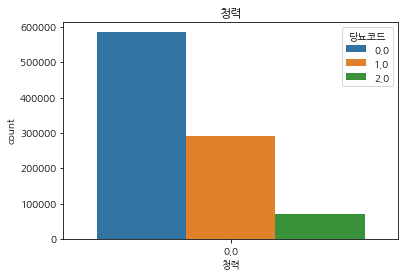

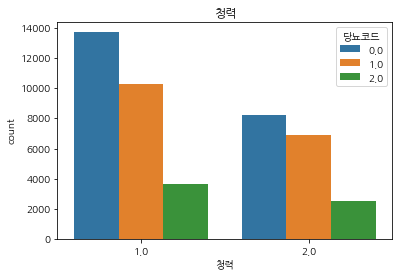

In [54]:
df_not_deaf = df.loc[df['청력']==0].copy()
df_deaf = df.loc[df['청력']!=0].copy()
get_compare_plot('청력', df_not_deaf, '당뇨코드')
get_compare_plot('청력', df_deaf, '당뇨코드')

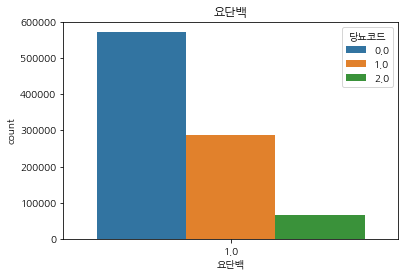

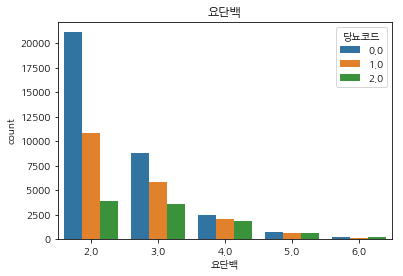

In [55]:
df_protein = df.loc[df['요단백']==1].copy()
df_protein2 = df.loc[df['요단백']!=1].copy()
get_compare_plot('요단백', df_protein)
get_compare_plot('요단백', df_protein2)
#요단백이 3 이상일 시 유의미 한 수치인 듯

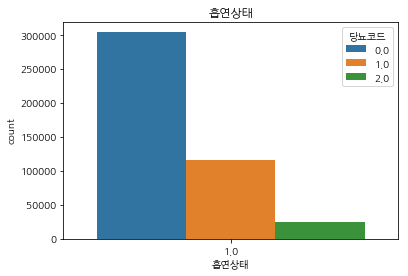

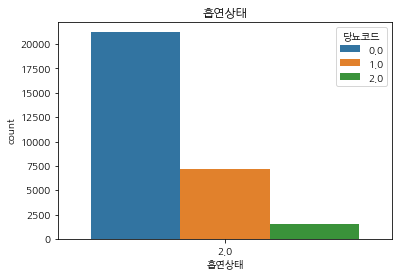

In [56]:
df_cigar_female = df_female.loc[df_female['흡연상태']==1]
df_not_cigar_female = df_female.loc[df_female['흡연상태']!=1]

get_compare_plot('흡연상태', df_cigar_female)
get_compare_plot('흡연상태', df_not_cigar_female)
#여성의 경우 크게 상관이 없으나 남성의 경우 애매함